# Figs/Movie of SST/Surface Velocities/TCC

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

In [2]:
sst_ds = xr.open_dataset('/work5/stb/ERA5/sst.nc')
tcc_ds = xr.open_dataset('/work5/stb/ERA5/tcc.nc')
mslp_ds = xr.open_dataset('/work5/stb/ERA5/mslp.nc')
u10_ds = xr.open_dataset('/work5/stb/ERA5/u10.nc')
v10_ds = xr.open_dataset('/work5/stb/ERA5/v10.nc')
mask_ds = xr.open_dataset('/work5/stb/ERA5/mask.nc')
lcc_ds = xr.open_dataset('/work/Shanice.Bailey/ERA5/lcc.nc')

In [4]:
time_slice = dict(time=slice('1993', '2021-06-30'))
sst = sst_ds.sea_surface_temperature.sel(**time_slice)
tcc = tcc_ds.total_cloud_cover.sel(**time_slice)
mslp = mslp_ds.mean_sea_level_pressure.sel(**time_slice)
u10 = u10_ds['10m_u_component_of_wind'].sel(**time_slice)
v10 = v10_ds['10m_v_component_of_wind'].sel(**time_slice)
mask = mask_ds.land_sea_mask
lcc = lcc_ds.lcc.sel(**time_slice)

In [5]:
u10

<xarray.DataArray '10m_u_component_of_wind' (time: 249792, latitude: 55,
                                             longitude: 69)> Size: 4GB
[947960640 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 2MB 1993-01-01 ... 2021-06-30T23:00:00
Attributes:
    long_name:   10 metre U wind component
    short_name:  u10
    units:       m s**-1

In [6]:
#make a list of empty data arrays for each month
mo_list = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'octo', 'nov', 'dec']

sst_months = []
[sst_months.append(xr.DataArray().rename(i)) for i in mo_list]

tcc_months = []
[tcc_months.append(xr.DataArray().rename(i)) for i in mo_list]

u10_months = []
[u10_months.append(xr.DataArray().rename(i)) for i in mo_list]

v10_months = []
[v10_months.append(xr.DataArray().rename(i)) for i in mo_list]

mslp_months = []
[mslp_months.append(xr.DataArray().rename(i)) for i in mo_list]

lcc_months = []
[lcc_months.append(xr.DataArray().rename(i)) for i in mo_list]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [7]:
#populate each month data array w var's values for each corresponding month
#e.g. take all the Januaries and put them in their own DataArray
for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    sst_months[i] = sst.sel(time=sst['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    u10_months[i] = u10.sel(time=u10['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    v10_months[i] = v10.sel(time=v10['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    tcc_months[i] = tcc.sel(time=tcc['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    mslp_months[i] = tcc.sel(time=mslp['time.month']==j)

for (i,j) in zip(np.arange(0,12), np.arange(1,13)):
    lcc_months[i] = lcc.sel(time=lcc['time.month']==j)

In [8]:
#glorys is daily, era5 is hourly
899*24

21576

In [9]:
tcc_months[0]

<xarray.DataArray 'total_cloud_cover' (time: 21576, latitude: 55, longitude: 69)> Size: 328MB
[81880920 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 173kB 1993-01-01 ... 2021-01-31T23:00:00
Attributes:
    long_name:      Total cloud cover
    short_name:     tcc
    standard_name:  cloud_area_fraction
    units:          (0 - 1)

## Calculate trends

In [10]:
from scipy.stats import linregress

In [ ]:
trend_sst = []
for i in np.arange(0,len(sst_months)):
    trend_sst.append(sst_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #˚C/yr

trend_u10 = []
for i in np.arange(0,len(u10_months)):
    trend_u10.append(u10_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m/s/yr

trend_v10 = []
for i in np.arange(0,len(v10_months)):
    trend_v10.append(v10_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #m/s/yr

trend_tcc = []
for i in np.arange(0,len(tcc_months)):
    trend_tcc.append(tcc_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #0-1/yr

trend_mslp = []
for i in np.arange(0,len(mslp_months)):
    trend_mslp.append(mslp_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #0-1/yr

trend_lcc = []
for i in np.arange(0,len(lcc_months)):
    trend_lcc.append(lcc_months[i].groupby('time.year').mean('time').polyfit('year', deg=1)) #˚C/yr

In [14]:
trend_lcc[0]

<xarray.Dataset> Size: 61kB
Dimensions:               (degree: 2, latitude: 55, longitude: 69)
Coordinates:
  * degree                (degree) int64 16B 1 0
  * latitude              (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
  * longitude             (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 61kB nan ... ...

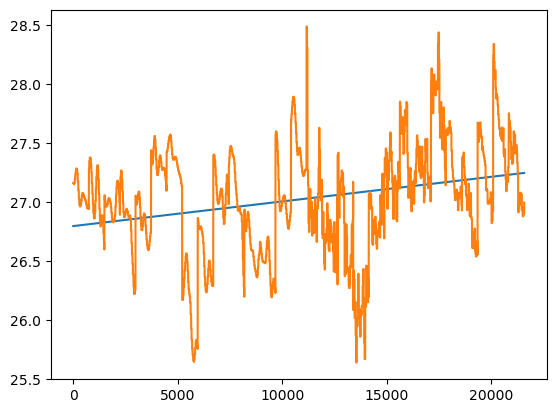

In [12]:
#get a sense of magnitude of trend slope at a single grid pt
z = np.polyfit(np.arange(1,21577), sst_months[0][:,50, 50], 1)
p = np.poly1d(z)
plt.plot(np.arange(1,21577), p(np.arange(1,21577)))
plt.plot(np.arange(1,21577), sst_months[0][:,50,50])

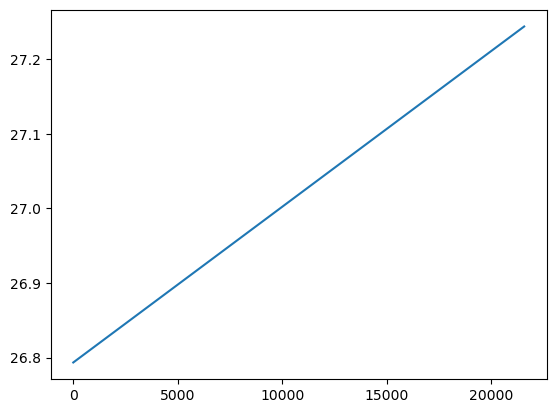

In [26]:
#get a sense of magnitude of trend slope at a single grid pt
z = np.polyfit(np.arange(1,21577), sst_months[0][:,50, 50], 1)
p = np.poly1d(z)
plt.plot(np.arange(1,21577), p(np.arange(1,21577)))
#plt.plot(np.arange(1,21577), sst_months[0][:,50,50])

## Trend maps of each month for each variable (1993-2021)

In [15]:
mo_titles = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plotting_func(trend_da, units, title, suptitle, vmin=None, vmax=None):
    proj = ccrs.Mercator() #with Mercator you can put lat lon values.
    fig, ax = plt.subplots(3, 4, figsize=(30, 20), subplot_kw=dict(projection=proj))

    ax = ax.ravel()
    for (i,j,k) in zip(np.arange(0,12), np.arange(0,len(trend_da)), mo_titles):
        ax[i].set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())
        ax[i].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                         edgecolor='face', facecolor='0.5'))
        da = trend_da[j].polyfit_coefficients[0]
        norm = colors.CenteredNorm()
        im = ax[i].pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                           cmap='PRGn', vmin=vmin, vmax=vmax) # norm=norm)
        cb = plt.colorbar(im, ax=ax[i], shrink=0.7, extend='both')
        cb.ax.set_title(f"{units}", fontsize=10)# labelpad=2, loc='top')
        
        g1 = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        g1.xlabels_top = False
        g1.ylabels_right = False

        left, width = .05, .5
        bottom, height = .25, .73
        right = left + width
        top = bottom + height
        #ax[i].set_title(f'{k}', horizontalalignment='left', verticalalignment='top', fontsize=26)
        ax[i].text(left, top, f'{k}', horizontalalignment='left', verticalalignment='top', 
                   fontsize=26, transform=ax[i].transAxes, color='white')
        
    plt.tight_layout()
    plt.suptitle(f'{suptitle}', y=1, fontweight='bold', fontsize=20);

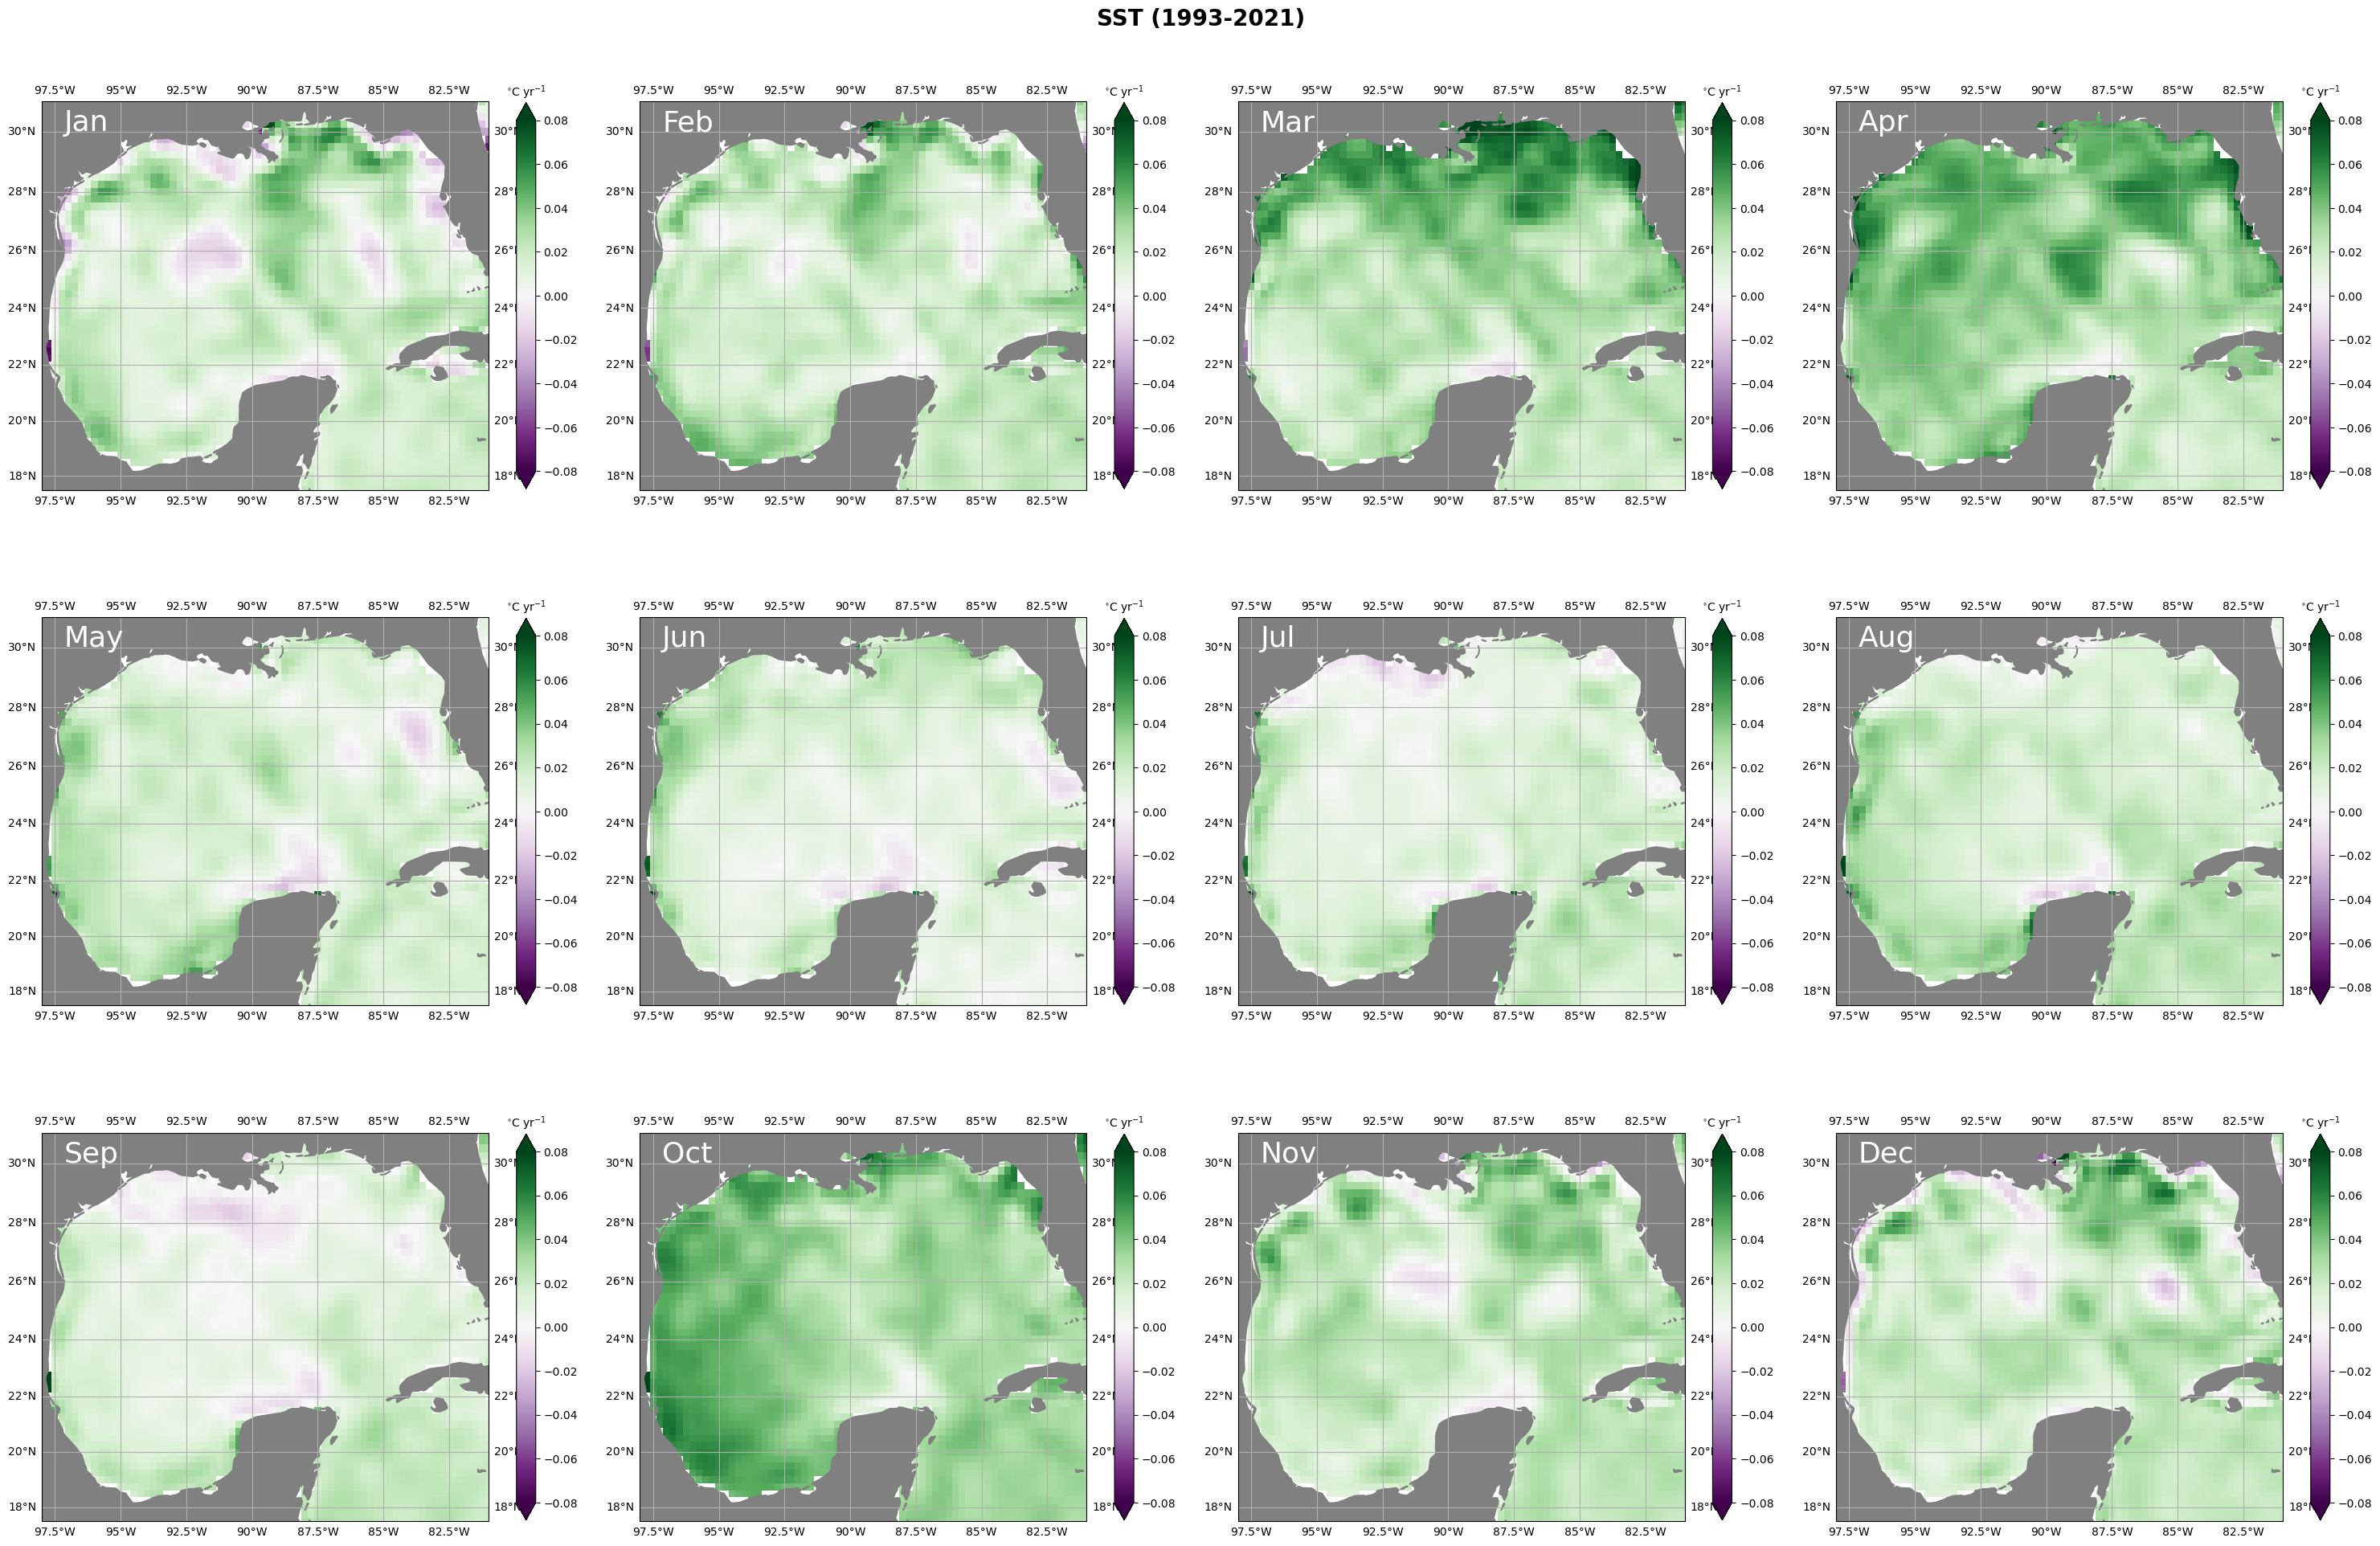

In [20]:
plotting_func(trend_sst, units=r'$^{\circ}$C yr$^{-1}$', title=mo_titles, suptitle='SST (1993-2021)', vmin=-8e-2, vmax=8e-2)

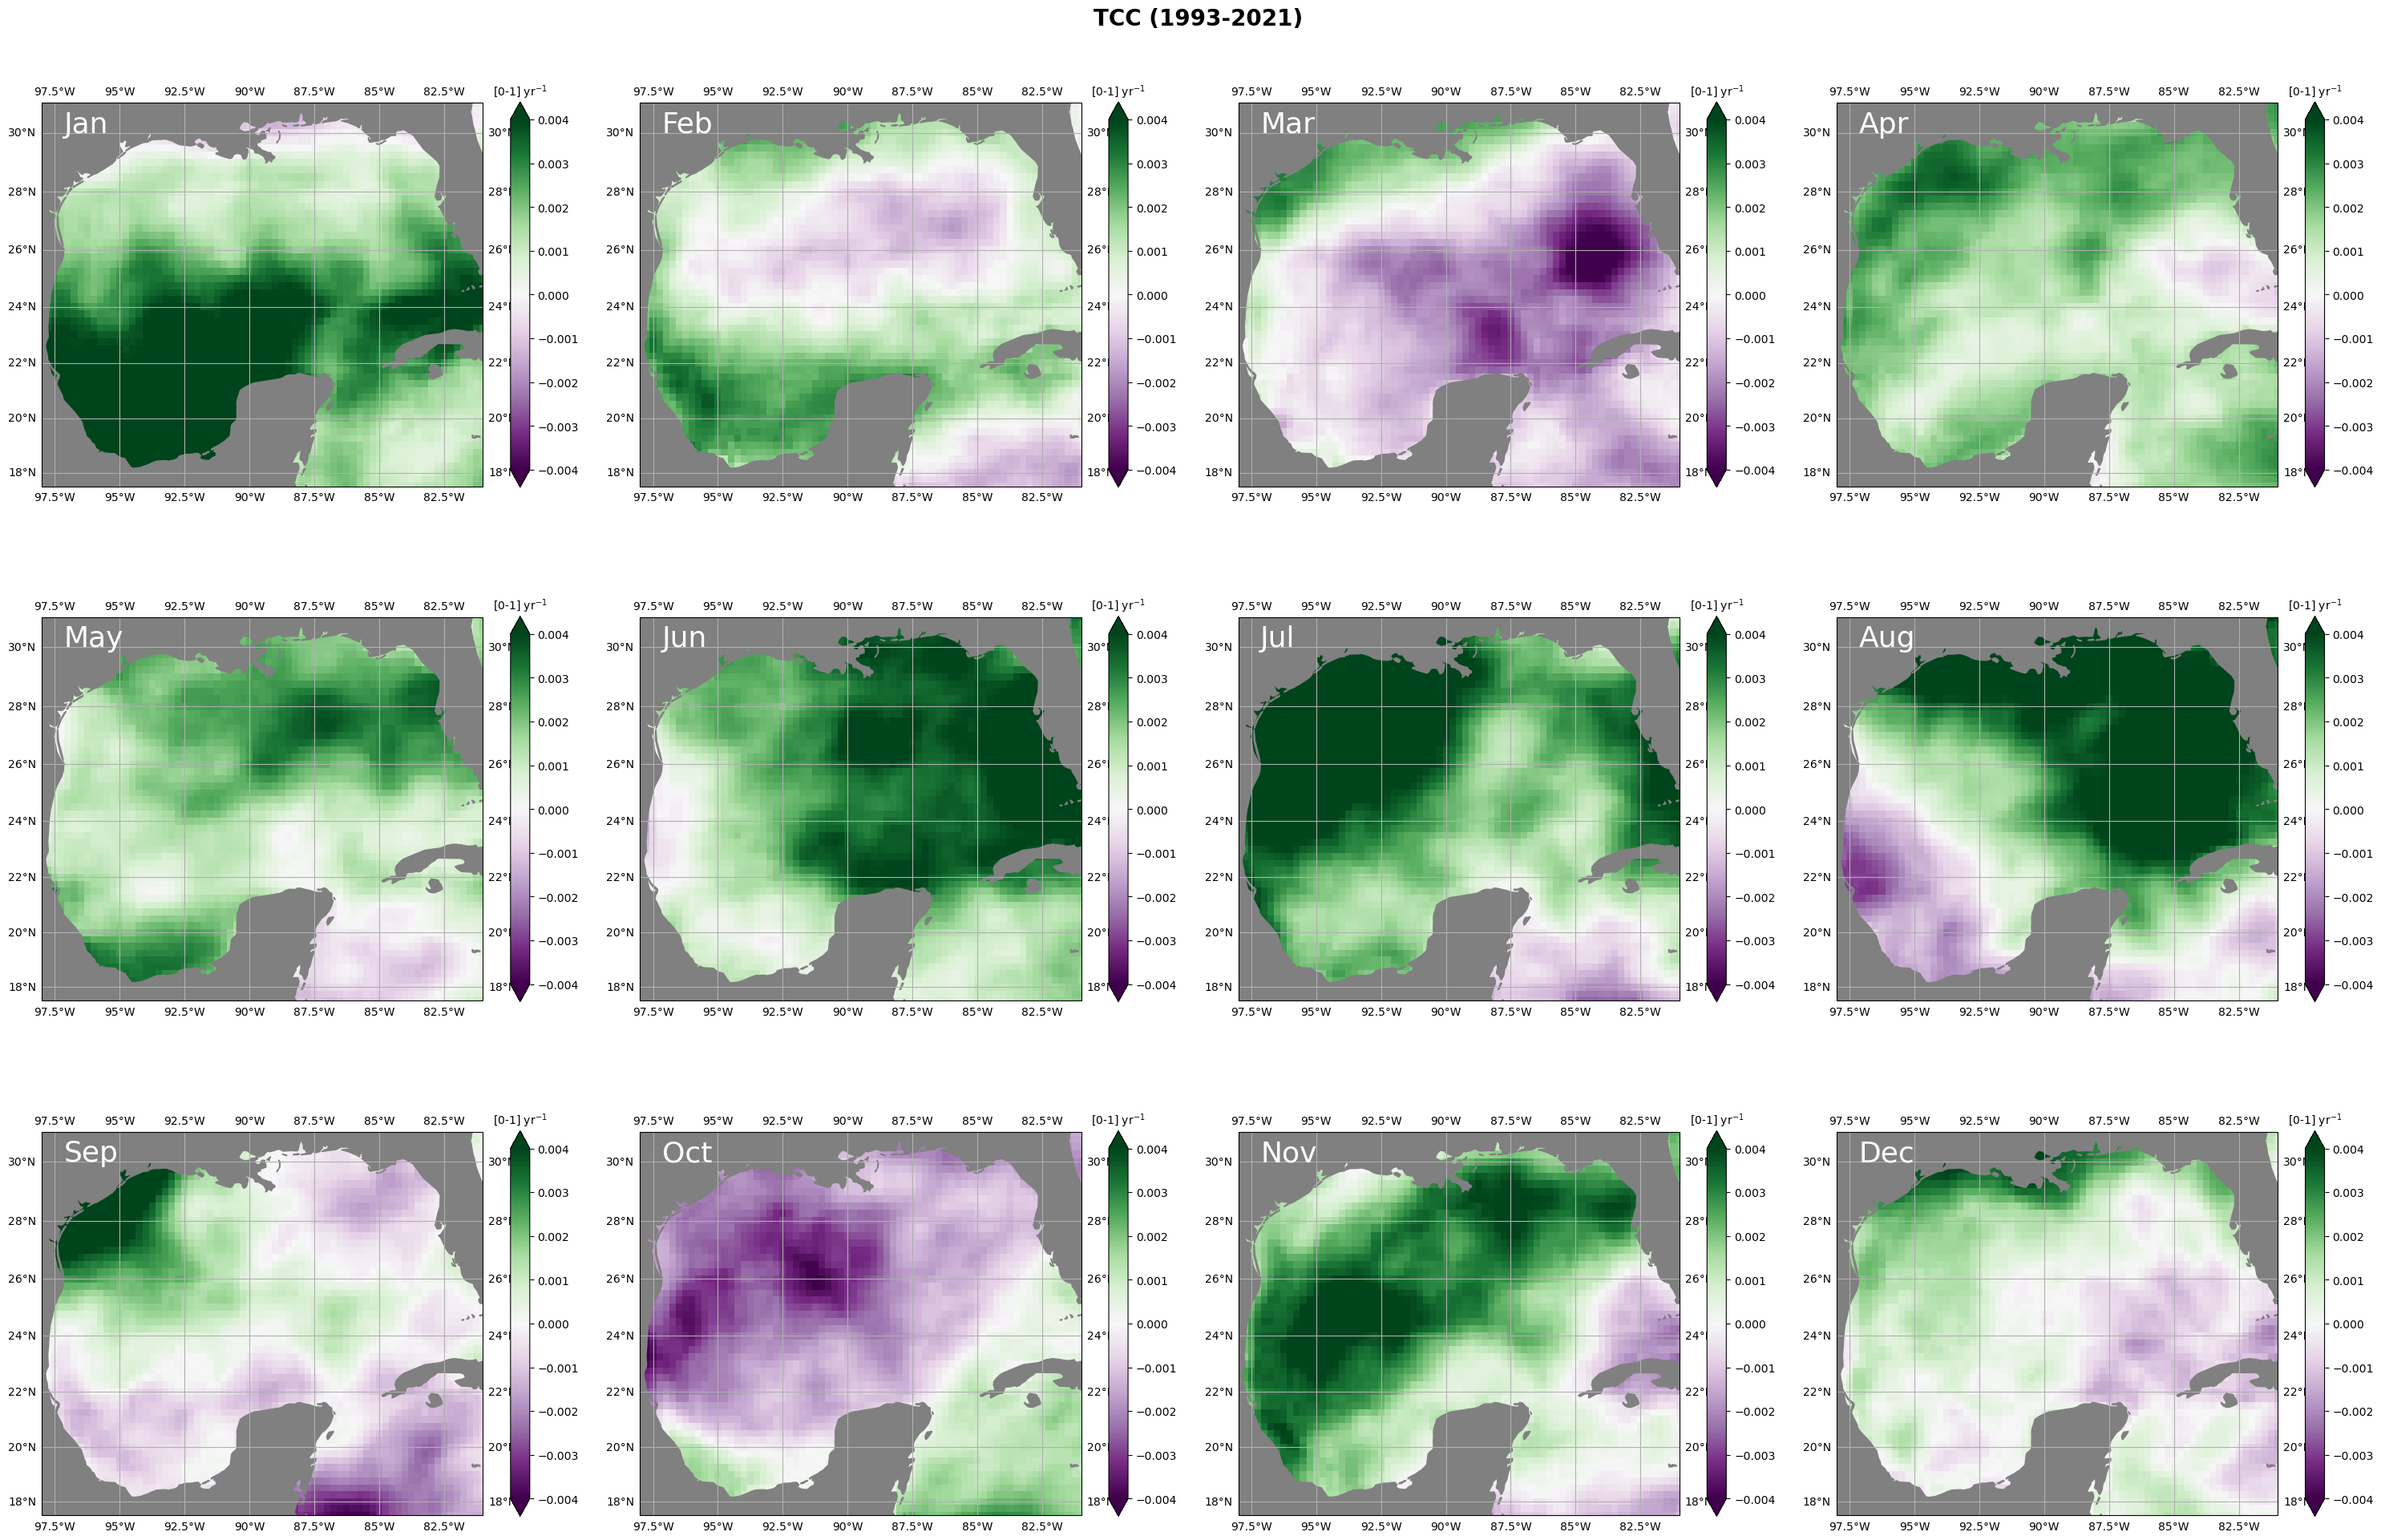

In [24]:
plotting_func(trend_tcc, units=r'[0-1] yr$^{-1}$', title=mo_titles, suptitle='TCC (1993-2021)', vmin=-4e-3, vmax=4e-3)

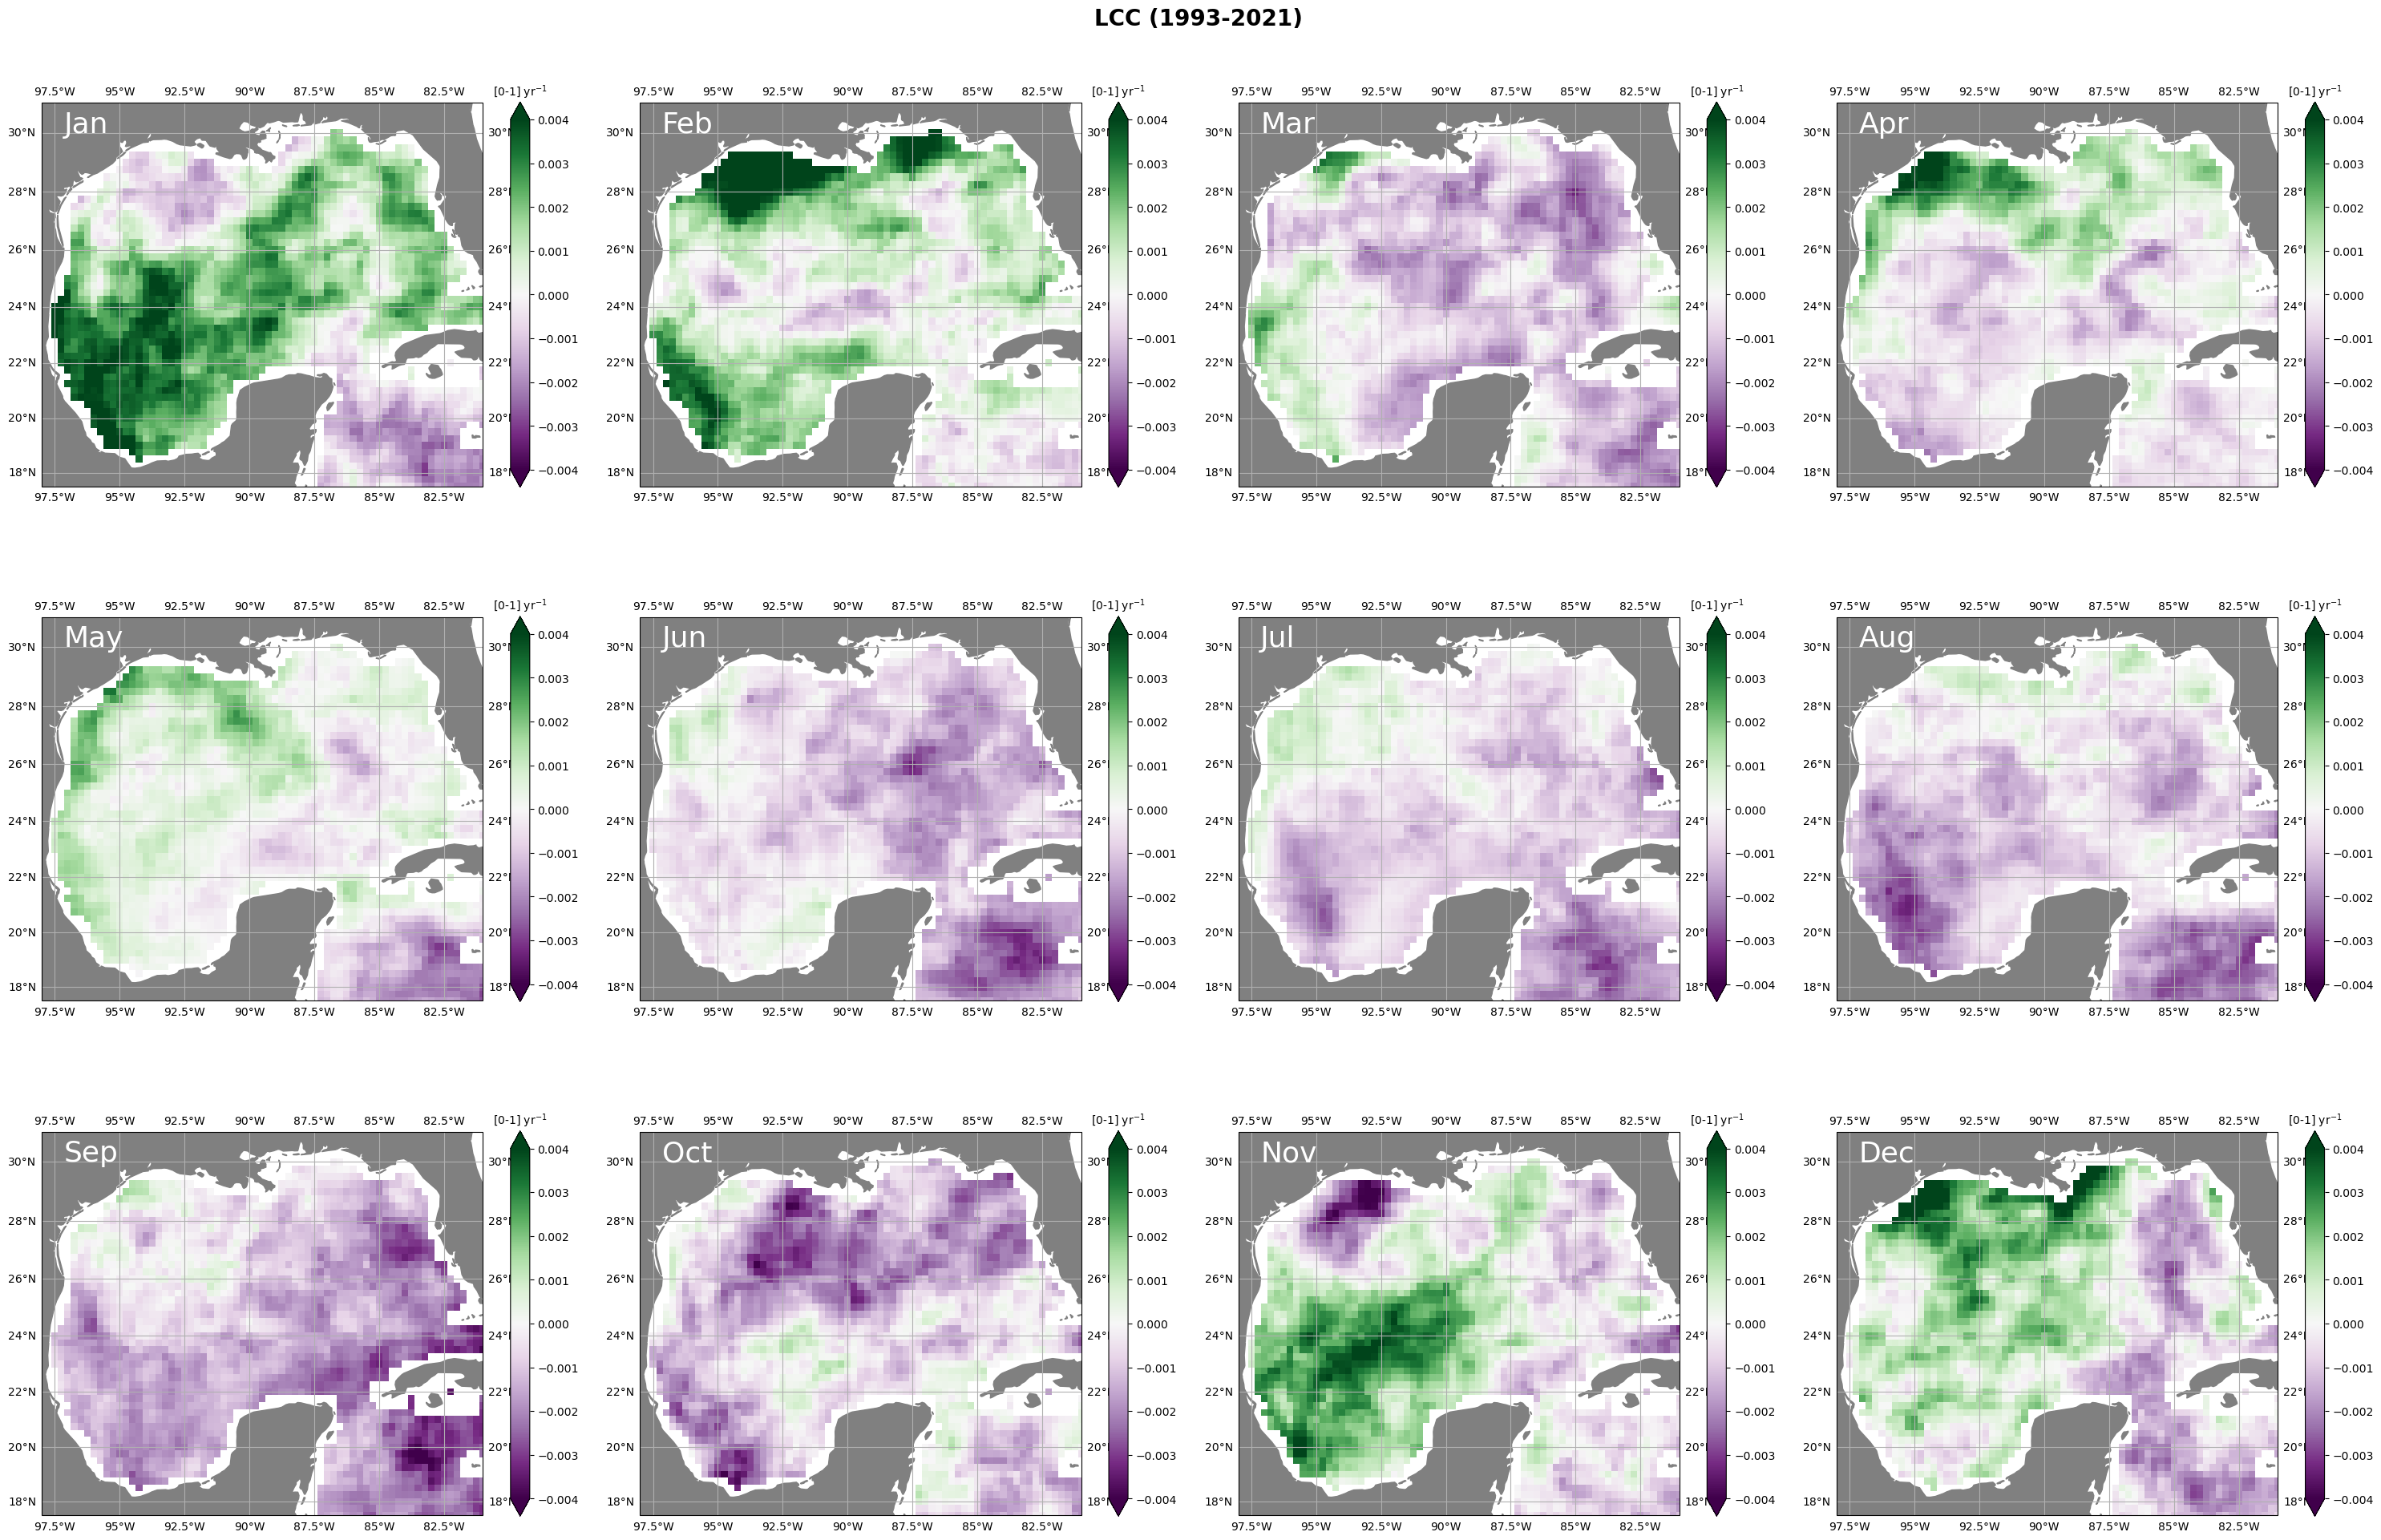

In [17]:
plotting_func(trend_lcc, units=r'[0-1] yr$^{-1}$', title=mo_titles, suptitle='LCC (1993-2021)', vmin=-4e-3, vmax=4e-3)

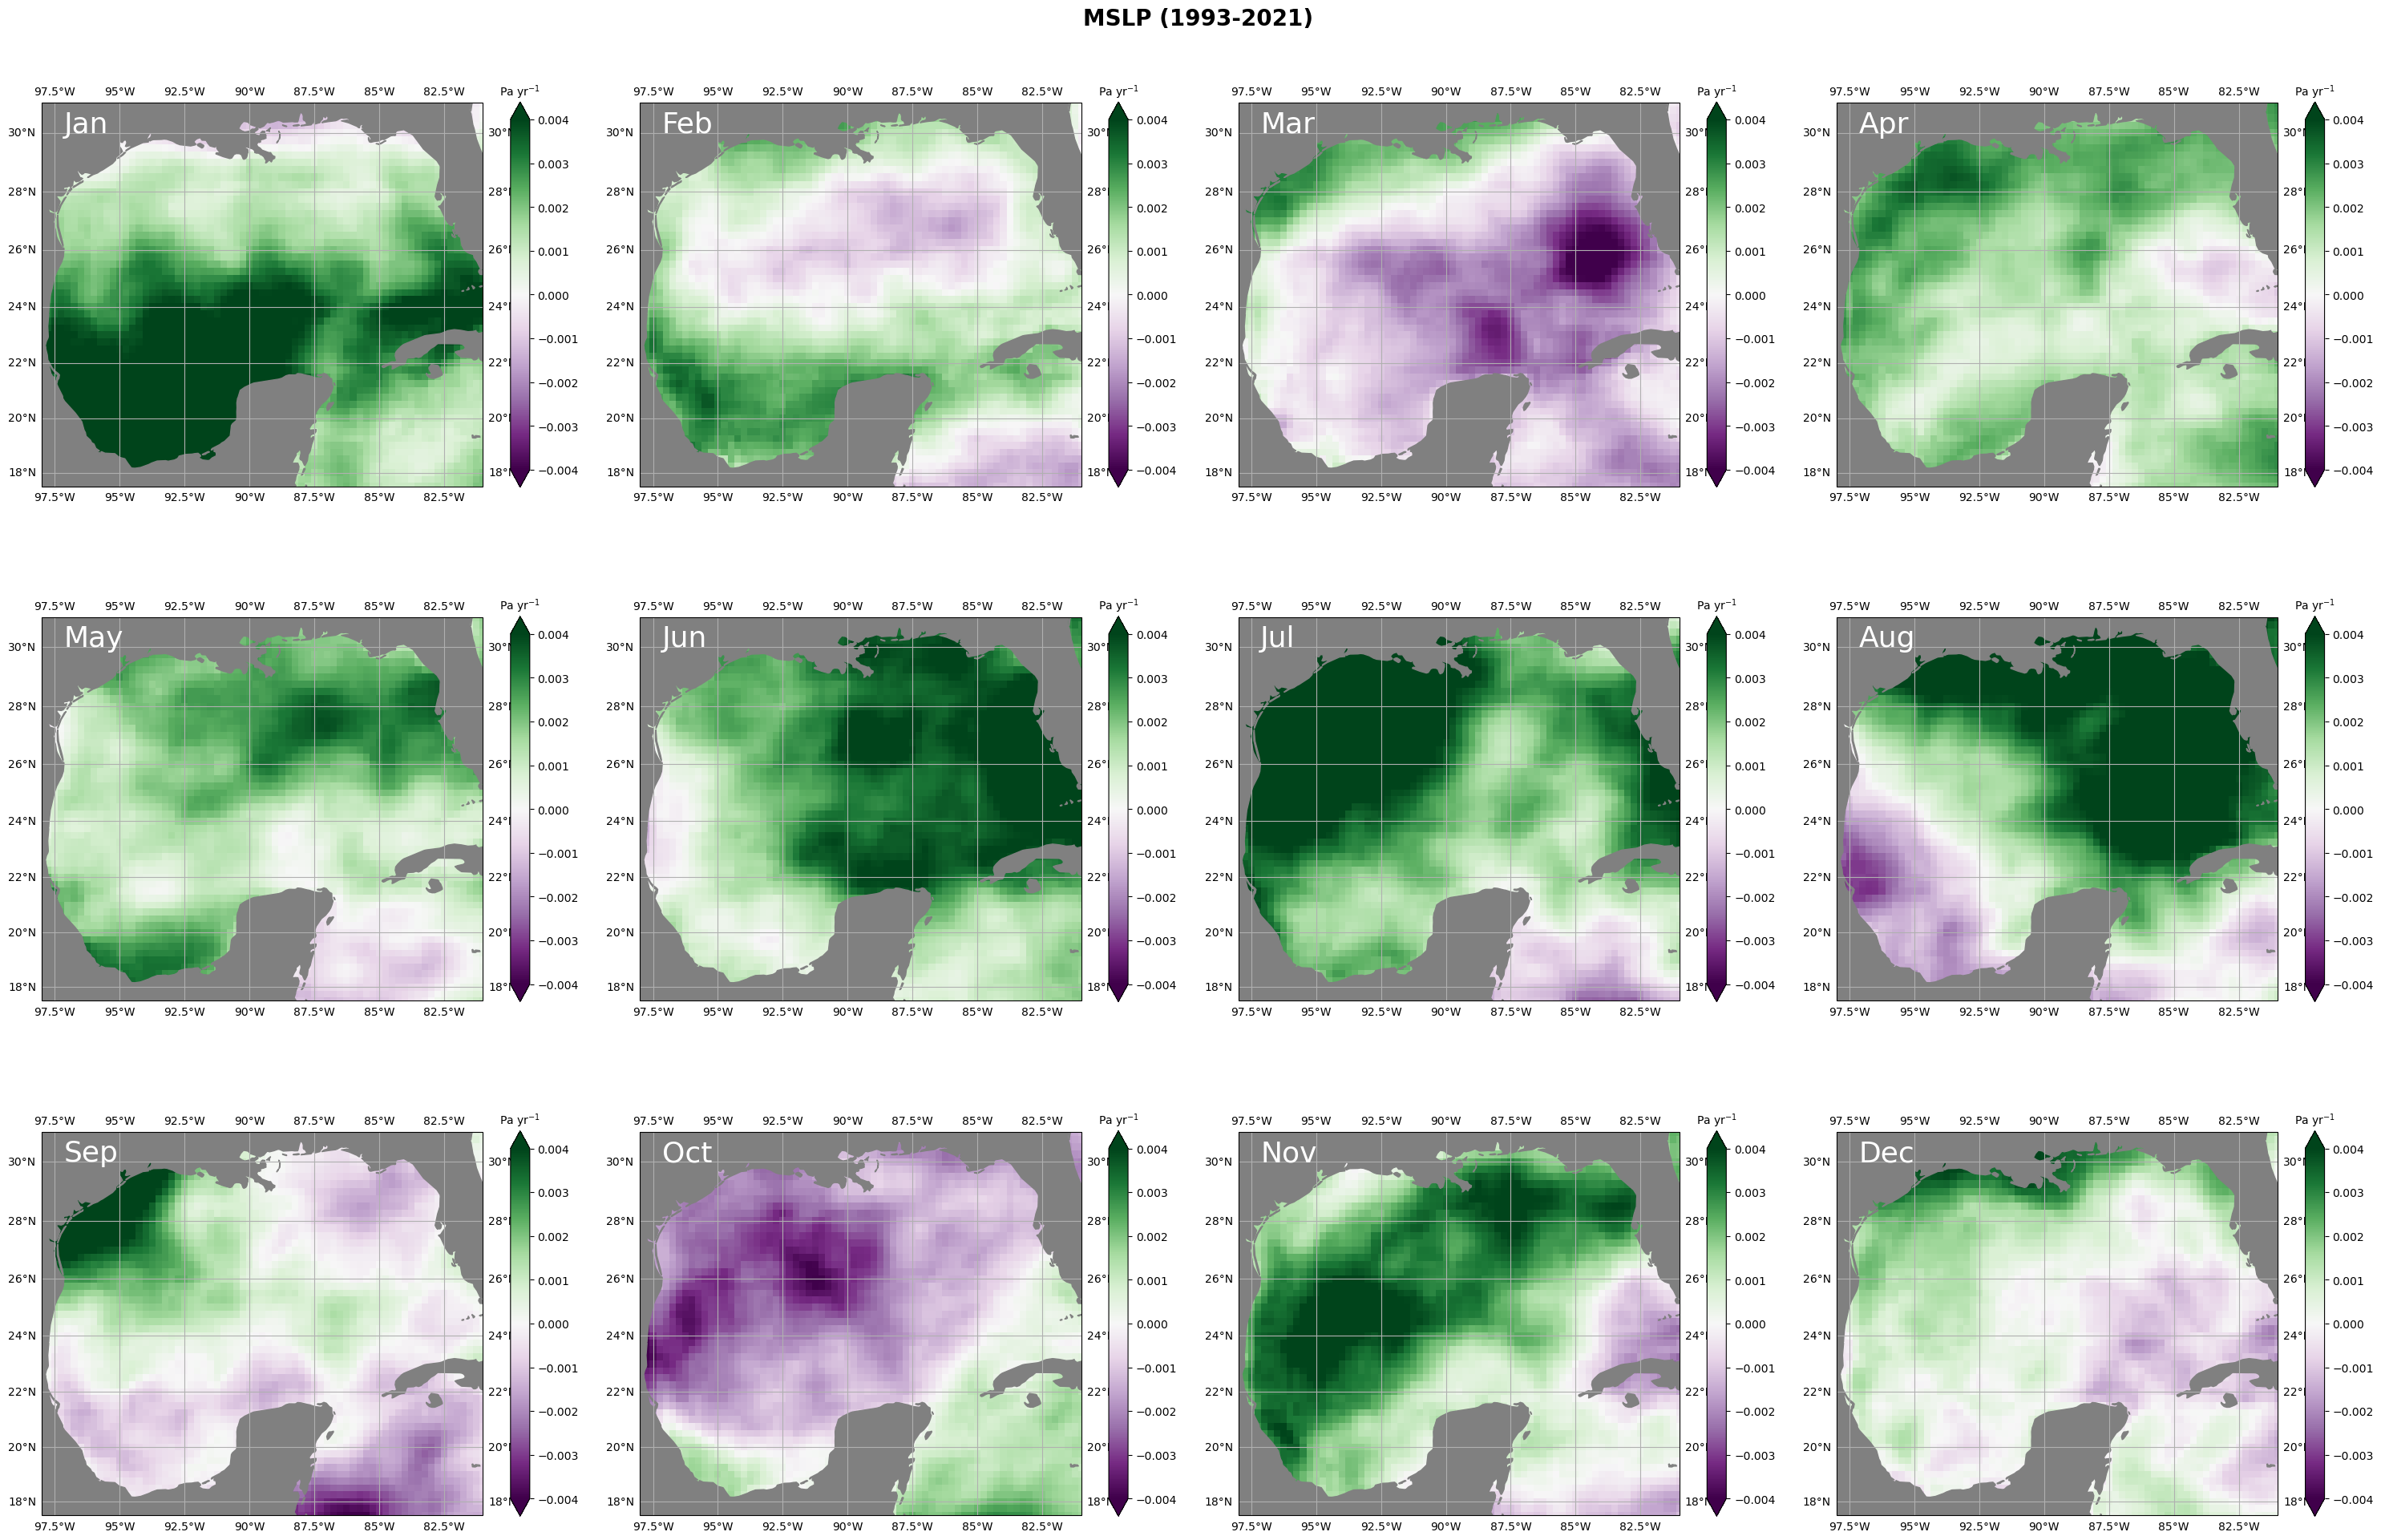

In [27]:
plotting_func(trend_mslp, units=r'Pa yr$^{-1}$', title=mo_titles, suptitle='MSLP (1993-2021)', vmin=-4e-3, vmax=4e-3)

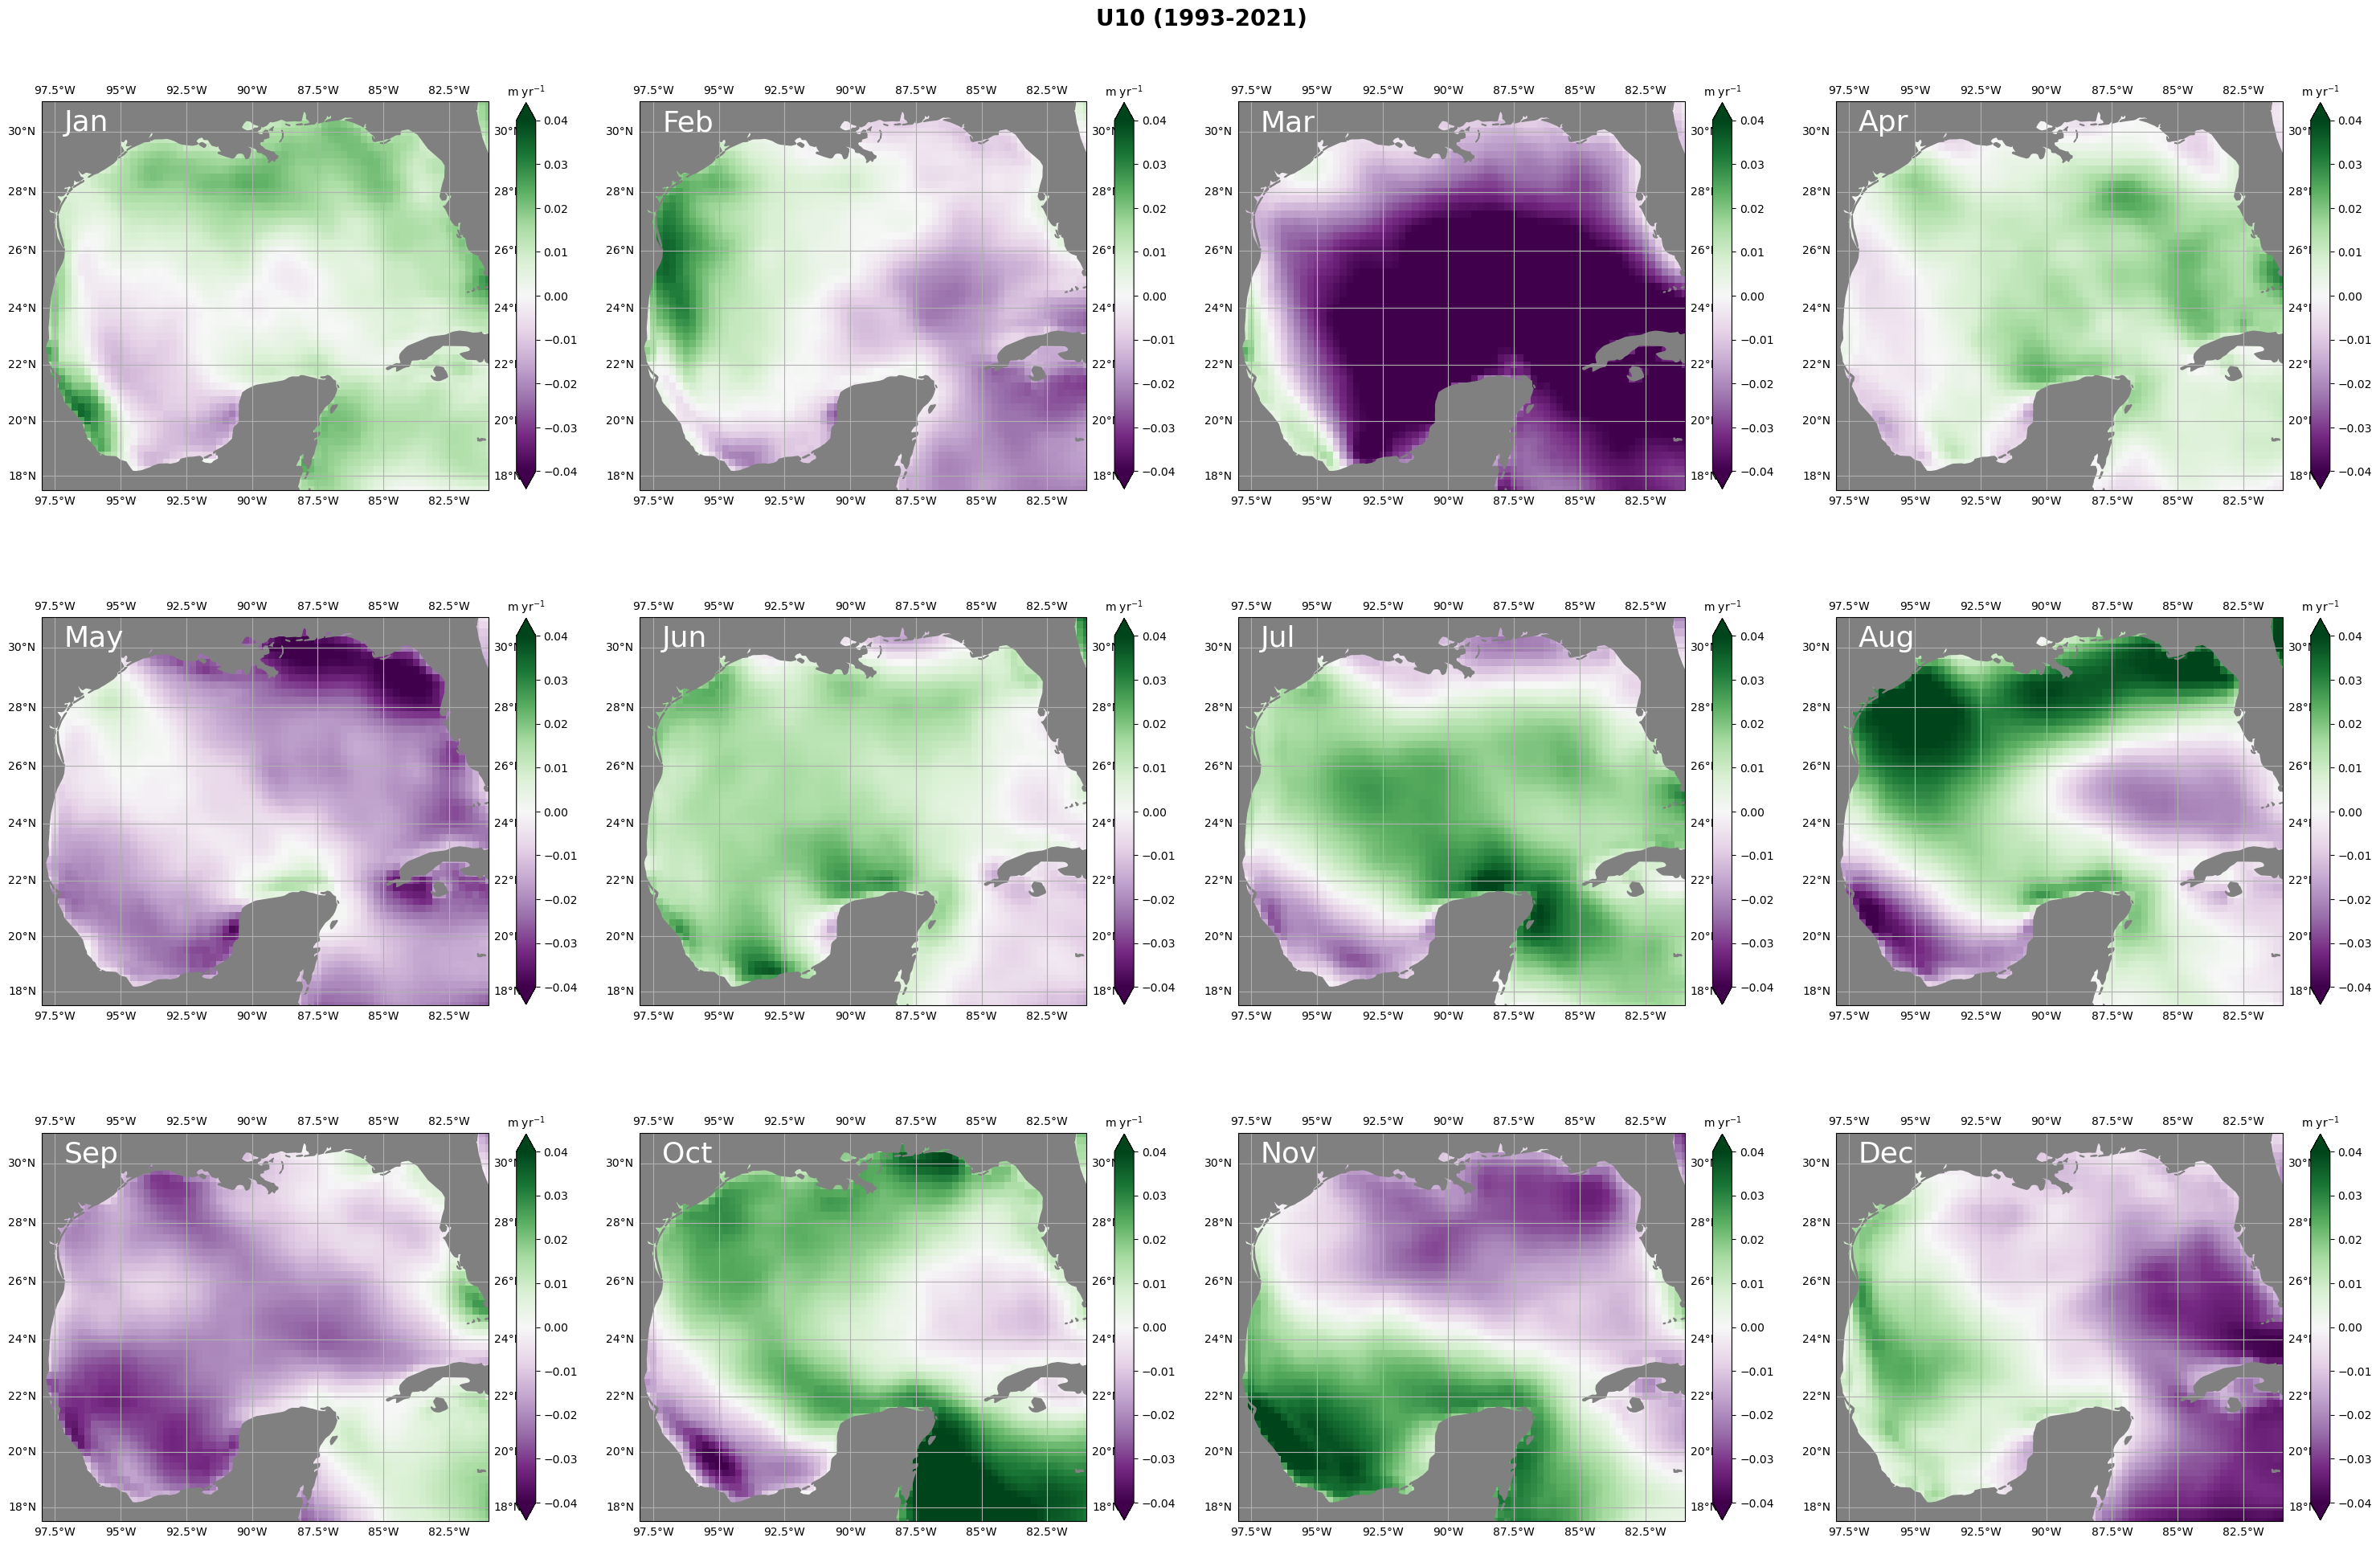

In [27]:
plotting_func(trend_u10, units=r'm yr$^{-1}$', title=mo_titles, suptitle='U10 (1993-2021)', vmin=-4e-2, vmax=4e-2)

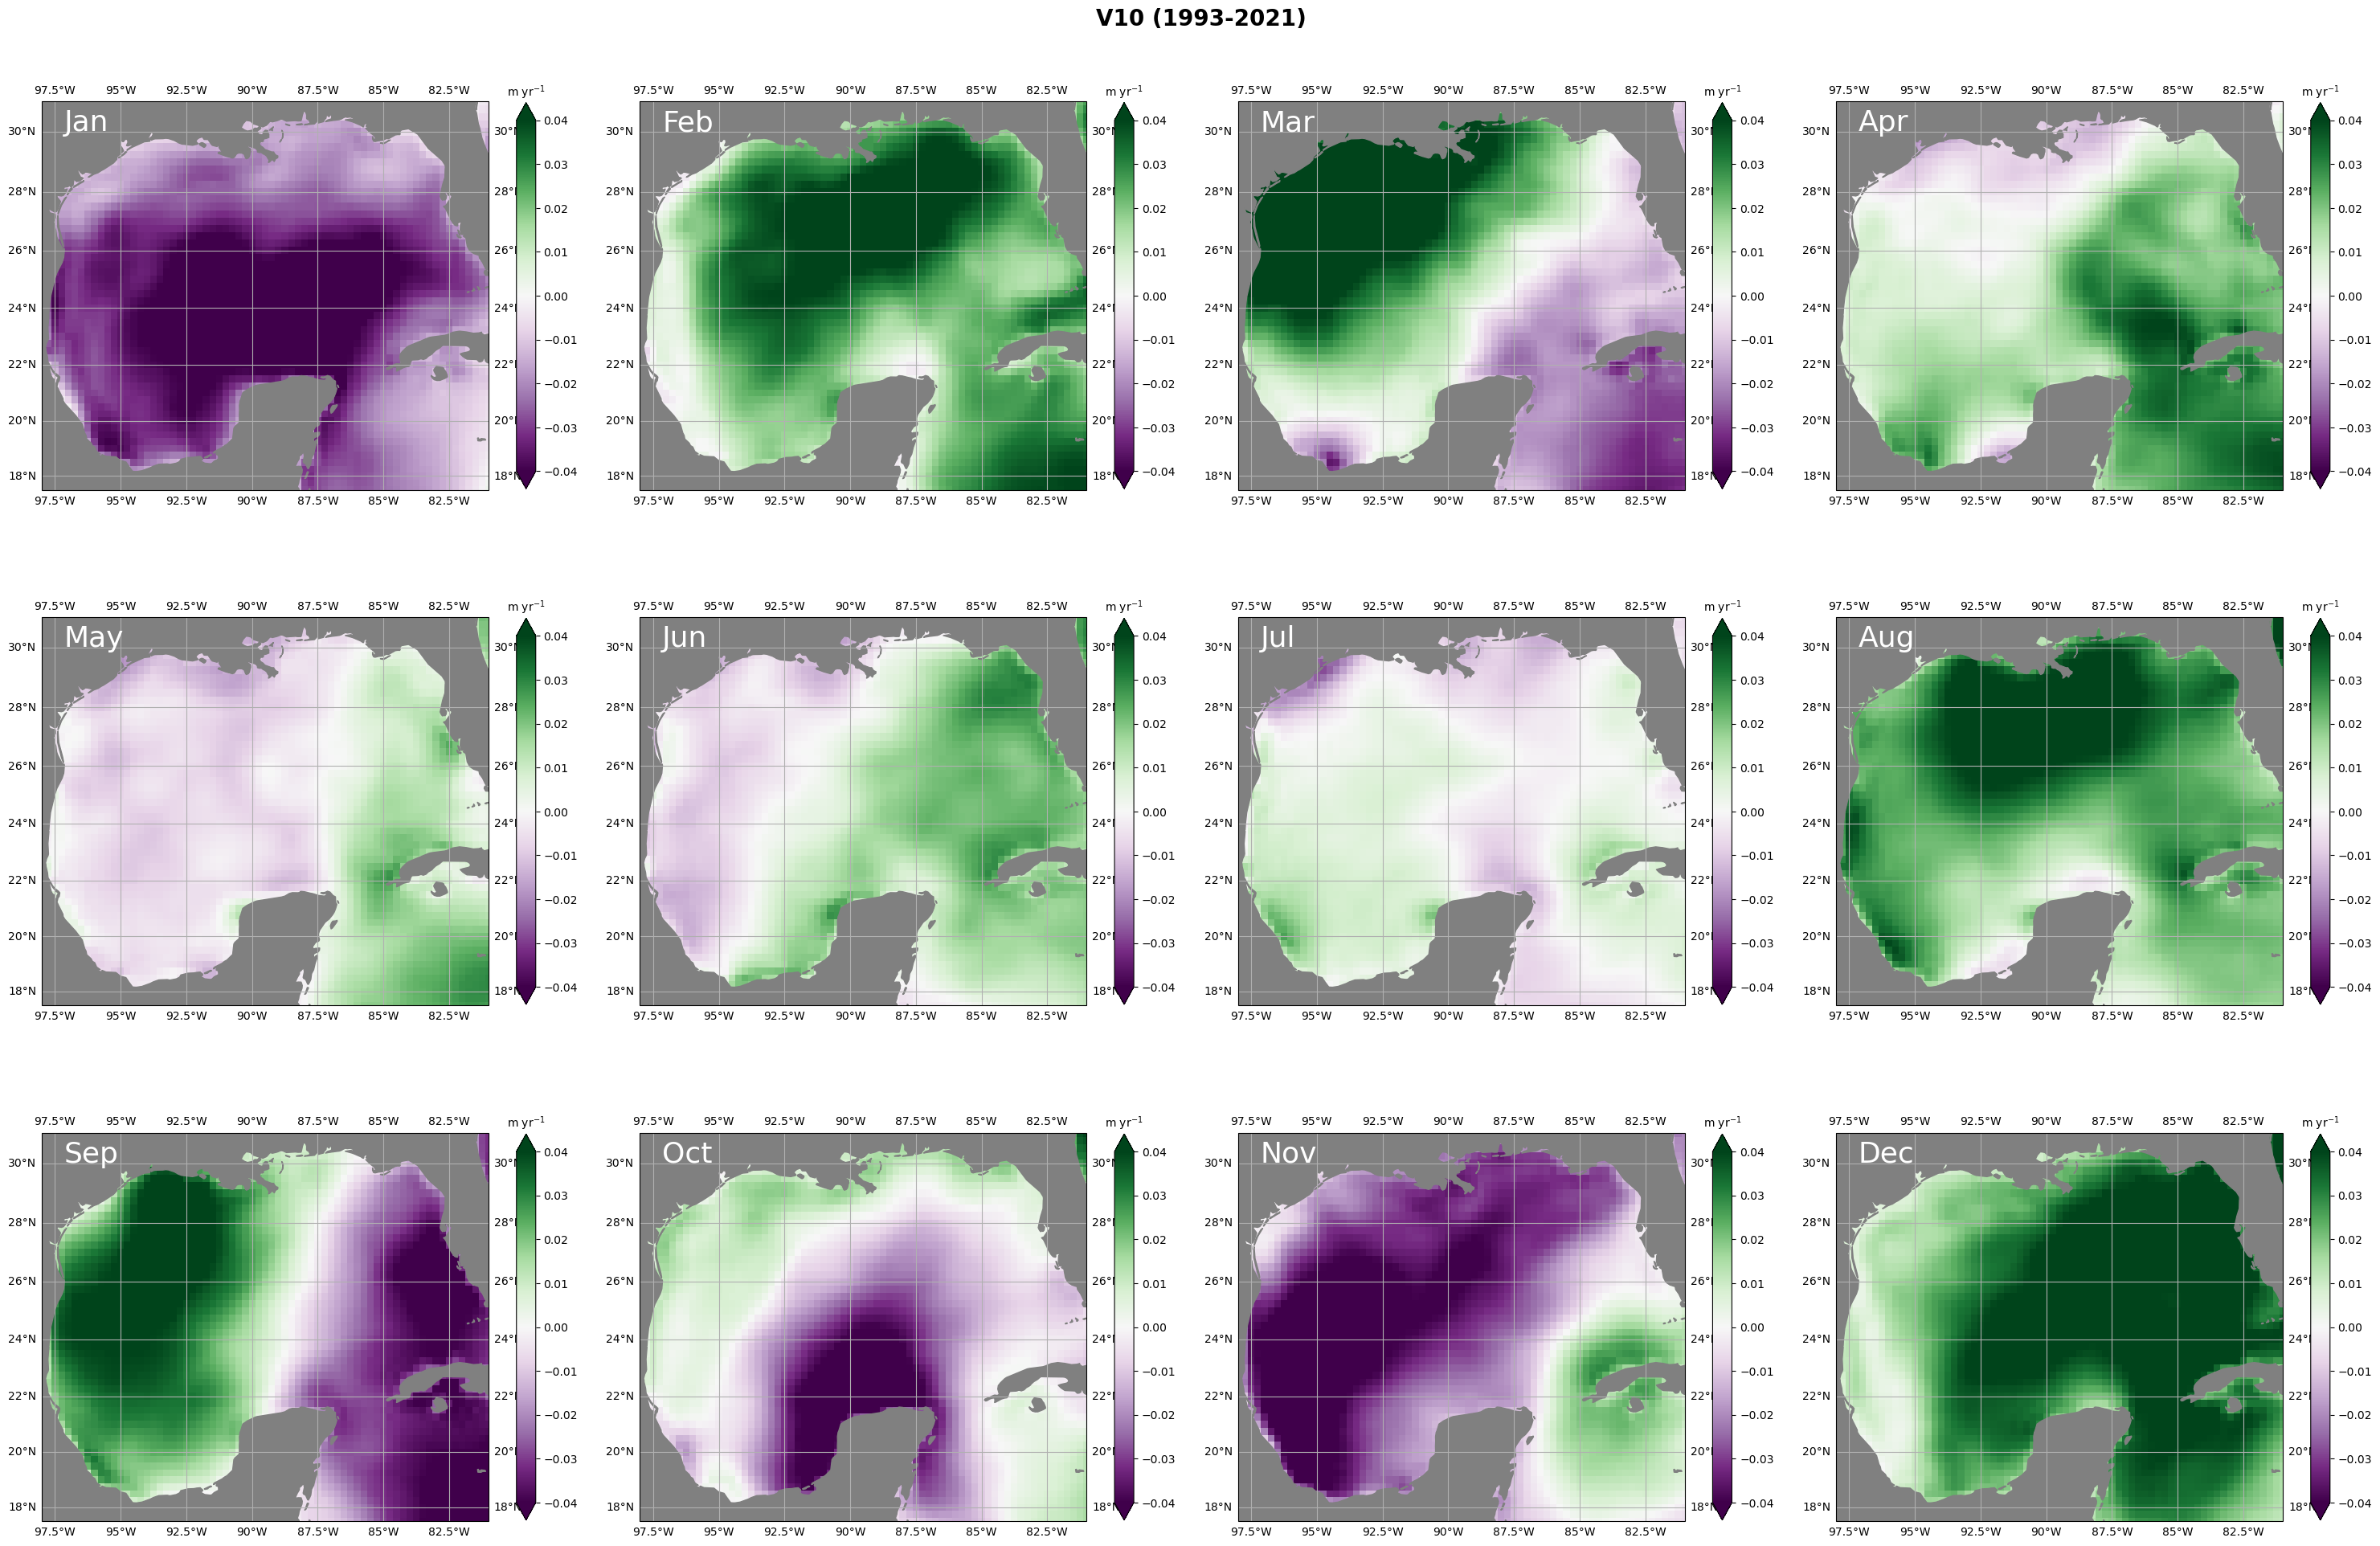

In [28]:
plotting_func(trend_v10, units=r'm yr$^{-1}$', title=mo_titles, suptitle='V10 (1993-2021)', vmin=-4e-2, vmax=4e-2)

## Trend lines

In [12]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 249792, latitude: 55,
                                             longitude: 69)> Size: 4GB
[947960640 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 2MB 1993-01-01 ... 2021-06-30T23:00:00

In [15]:
#go off of spatial avg instead of sum so that we see trend line in regular ˚C, otherwise we're just adding ˚C
trend_lr = linregress(np.arange(0,249792), sst.mean(['latitude', 'longitude']))#.fillna(0.))

In [16]:
trend_lr

LinregressResult(slope=np.float64(2.430080783892529e-06), intercept=np.float64(26.160452585689725), rvalue=np.float64(0.07130824026469601), pvalue=np.float64(6.8679392087006084e-279), stderr=np.float64(6.801214731715975e-08), intercept_stderr=np.float64(0.009808510939338244))

In [17]:
trend_line_lr = (trend_lr[0]*np.arange(0,249792) + trend_lr[1])

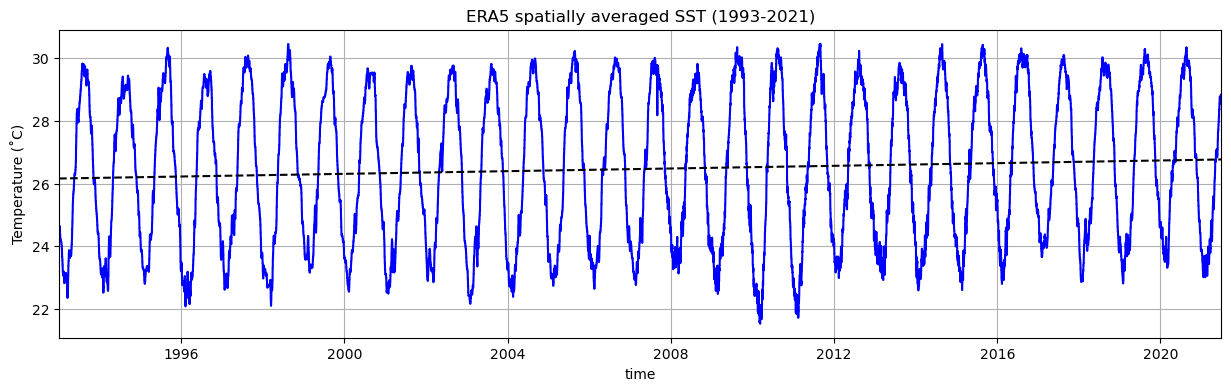

In [28]:
sst.mean(['latitude', 'longitude']).plot(figsize=(15,4), color='blue')
plt.plot(sst.time, trend_line_lr, color='k', linestyle='dashed')
plt.grid()
plt.ylabel('Temperature (˚C)')
plt.xlim(sst.time.sel(time='1993-01-01', method='nearest'), 
         sst.time.sel(time='2021-06-30', method='nearest'))
plt.title('ERA5 spatially averaged SST (1993-2021)');

In [27]:
print('Spatially averaged rate of SST increase over 1993-2021:', 
      (trend_line_lr[-1] - trend_line_lr[0]) / (2021-1993), 
      '˚C/yr')

Spatially averaged rate of SST increase over 1993-2021: 0.02167901103890354 ˚C/yr


## Trend maps

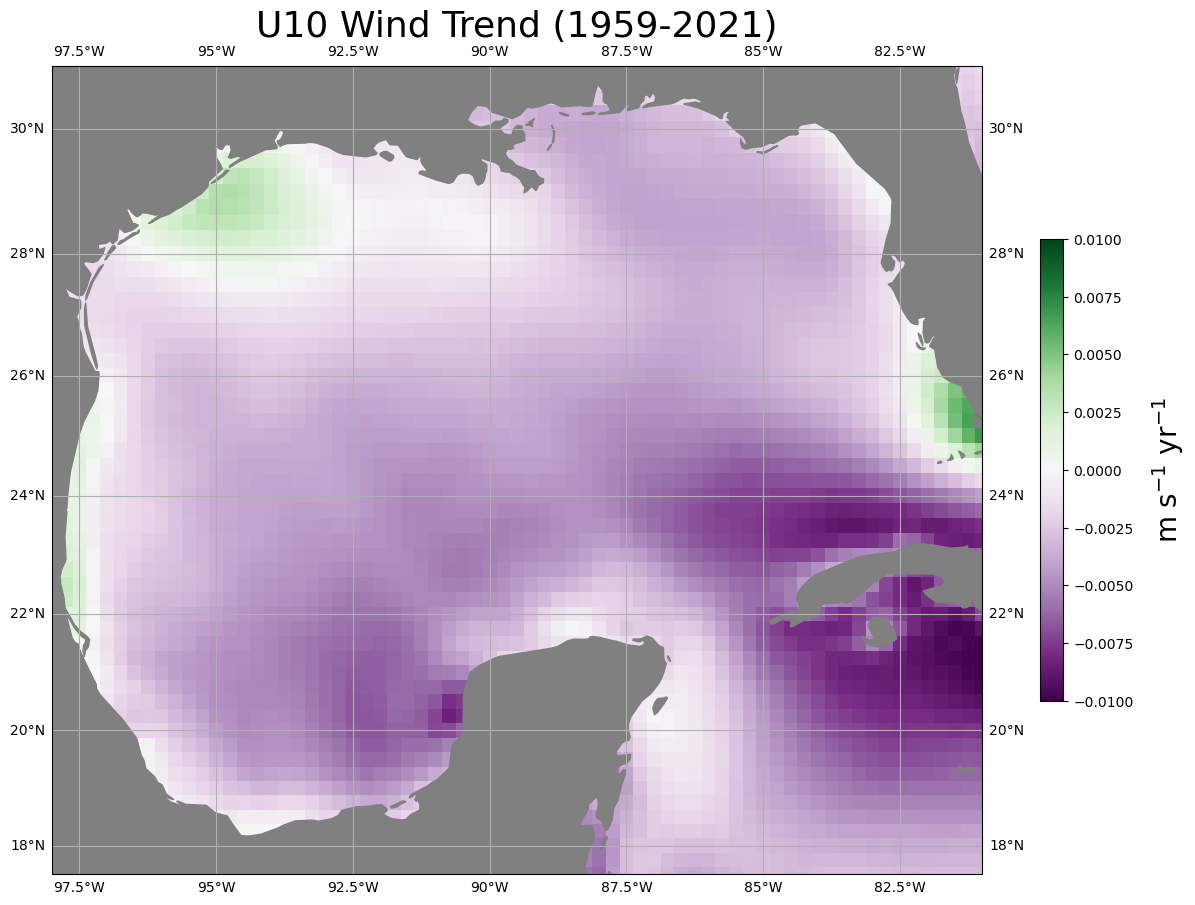

In [25]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_u.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('U10 Wind Trend (1959-2021)', fontsize=26);

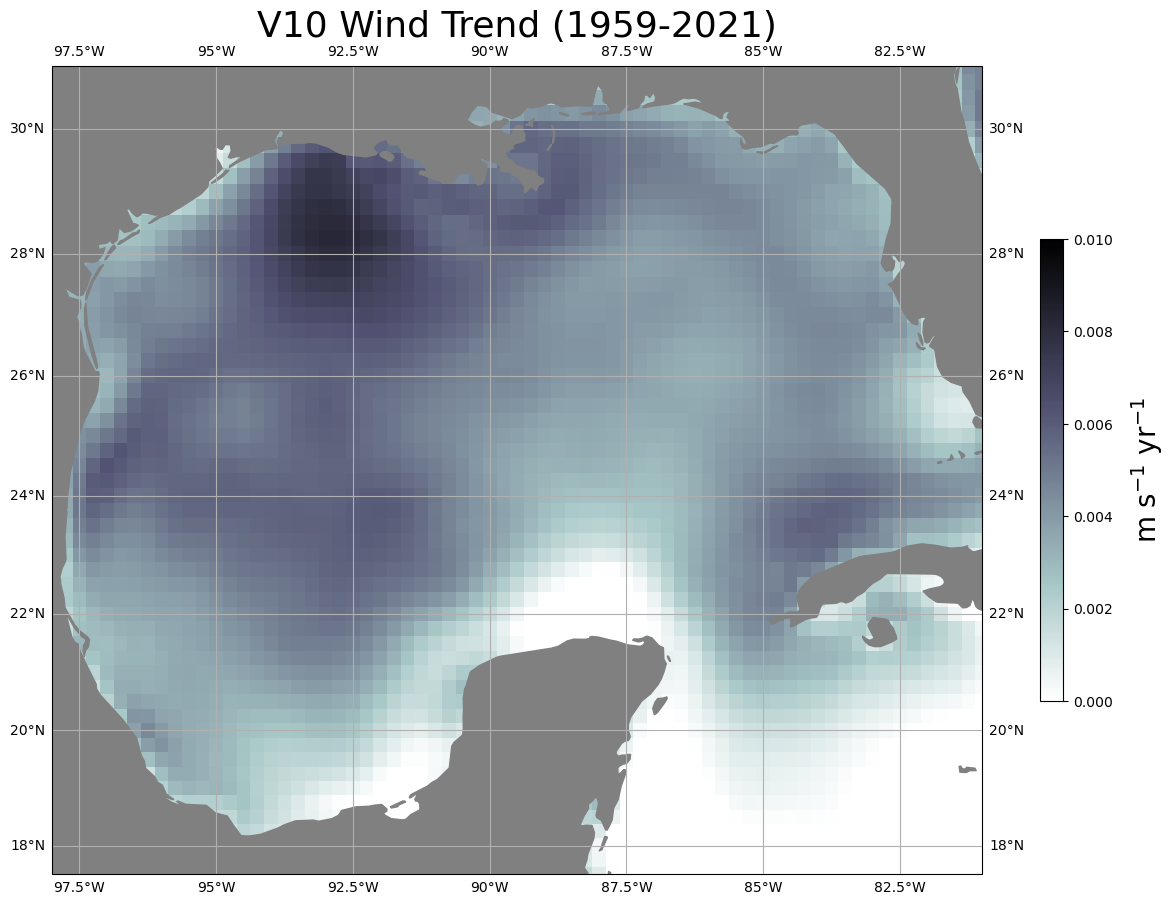

In [44]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_v.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='bone_r', vmin=0, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('V10 Wind Trend (1959-2021)', fontsize=26);

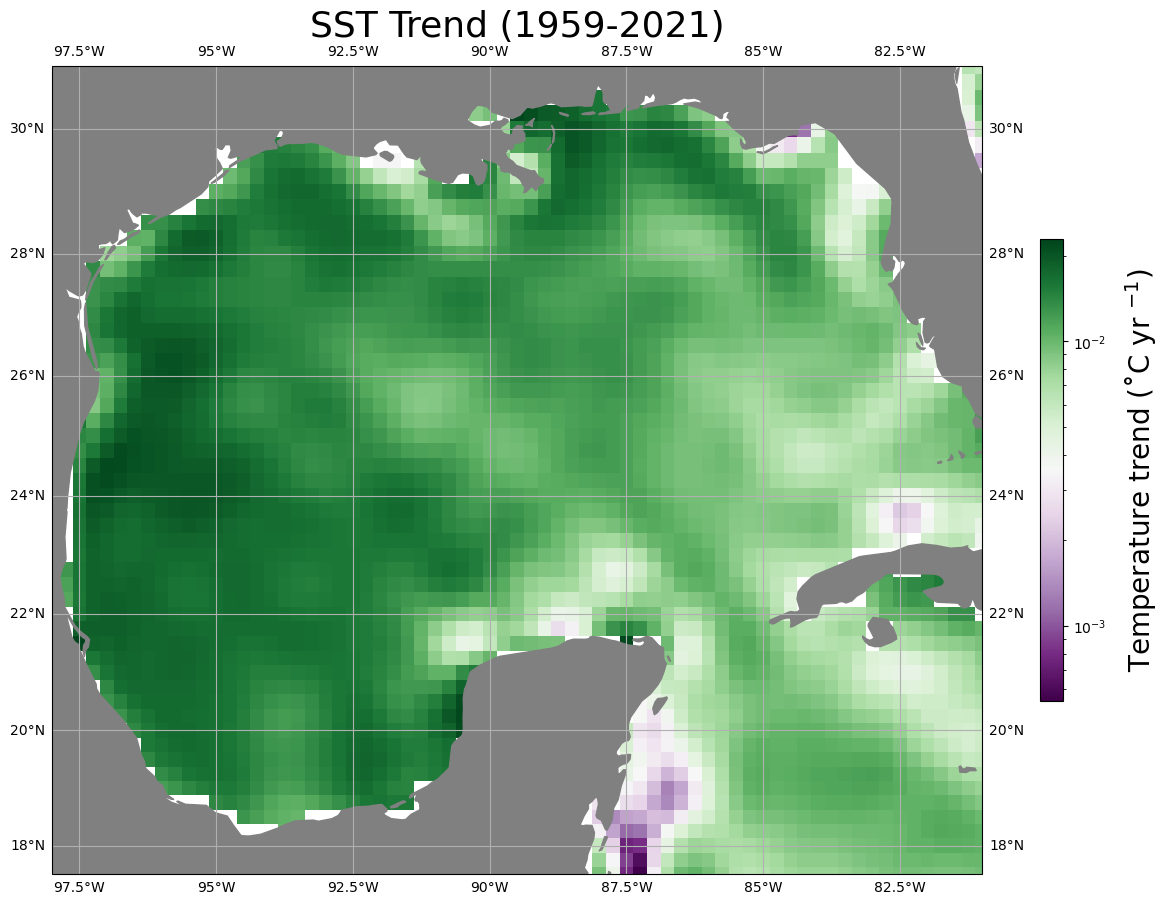

In [39]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   norm=LogNorm(), cmap='PRGn')#, vmin=-0.02, vmax=0.02)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1959-2021)', fontsize=26);

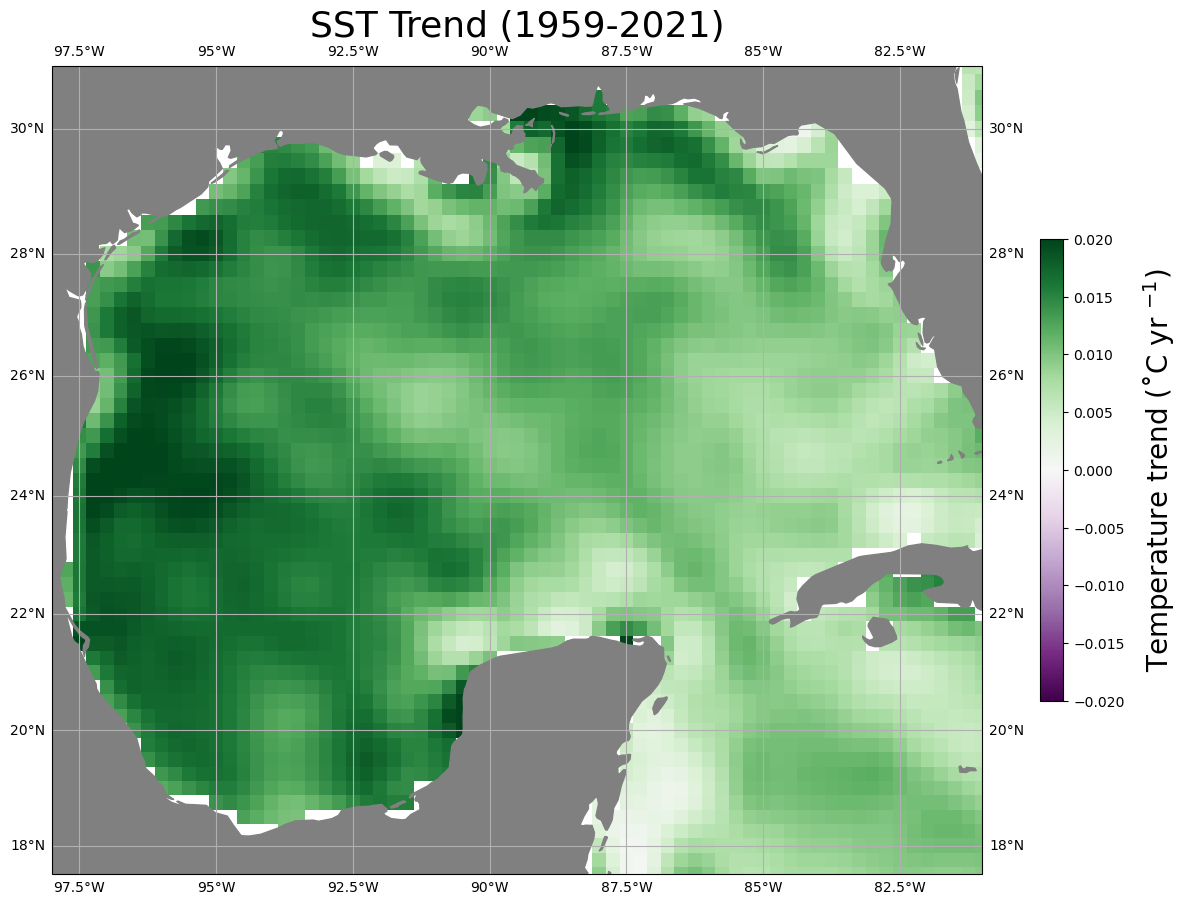

In [40]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.02, vmax=0.02)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1959-2021)', fontsize=26);

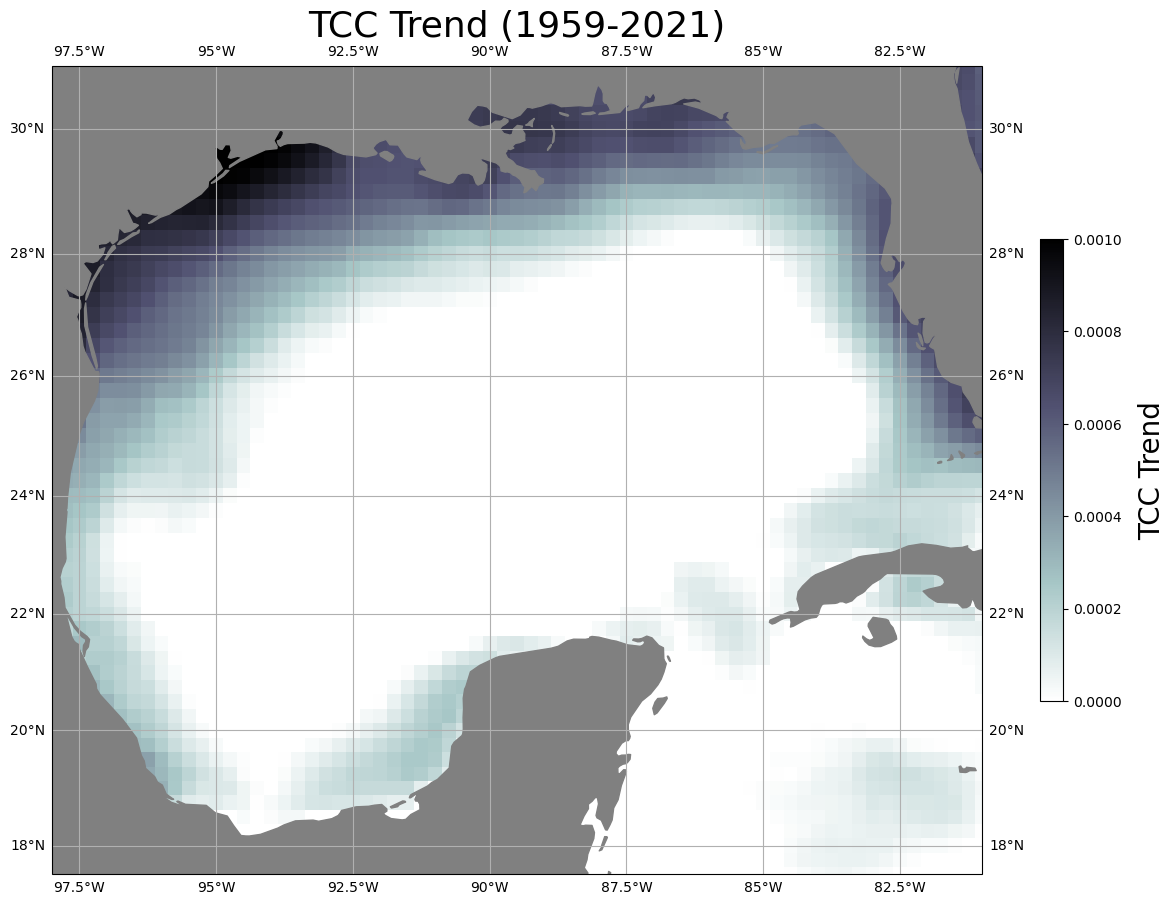

In [43]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='bone_r', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1959-2021)', fontsize=26);

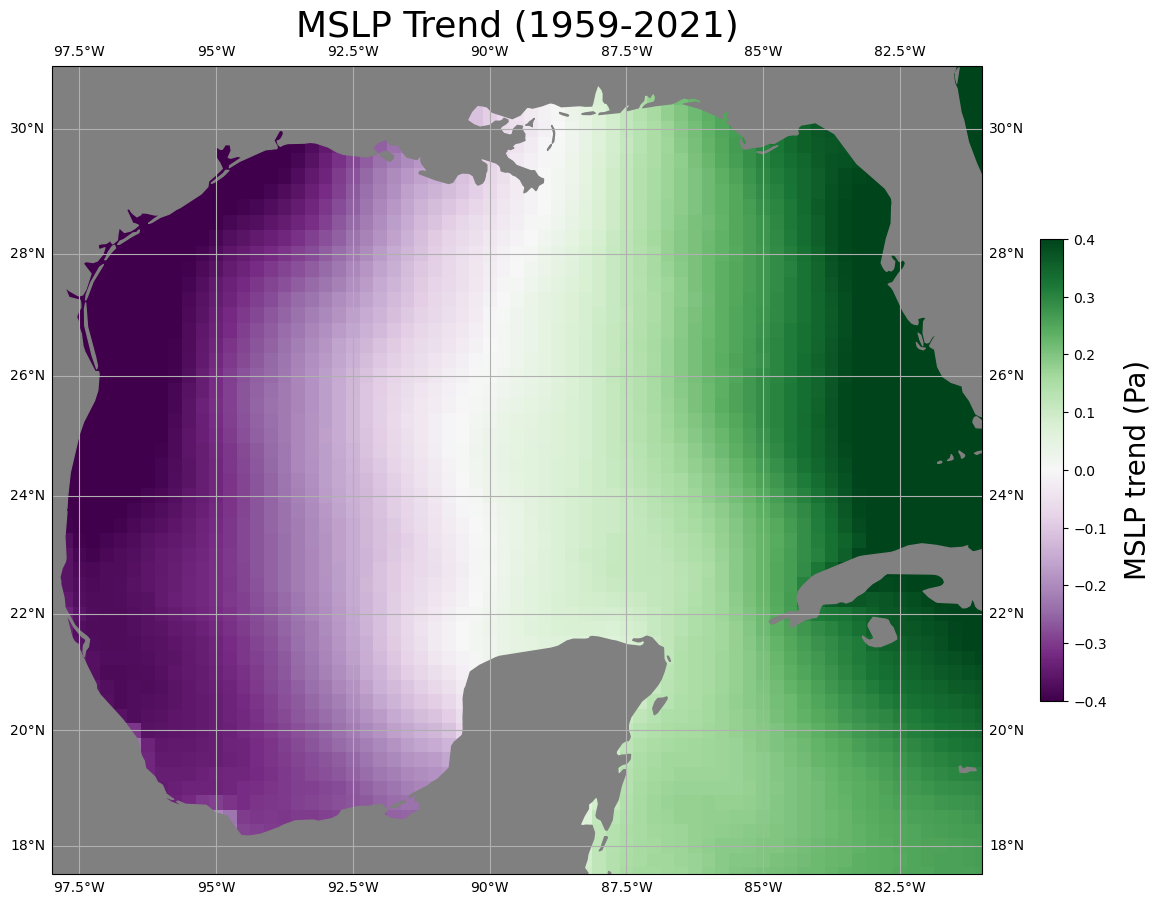

In [45]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.4, vmax=0.4)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1959-2021)', fontsize=26);

## Trend maps of anomalies

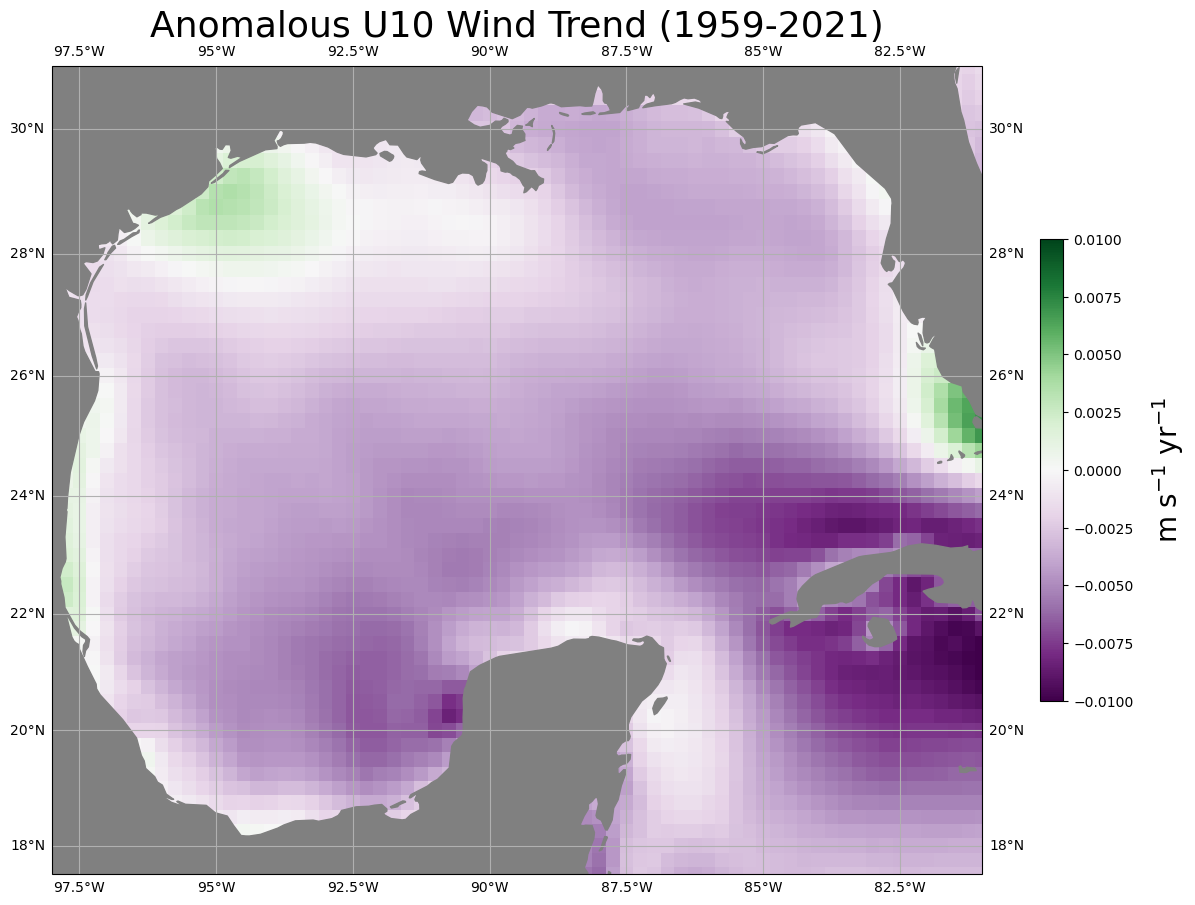

In [46]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_u.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous U10 Wind Trend (1959-2021)', fontsize=26);

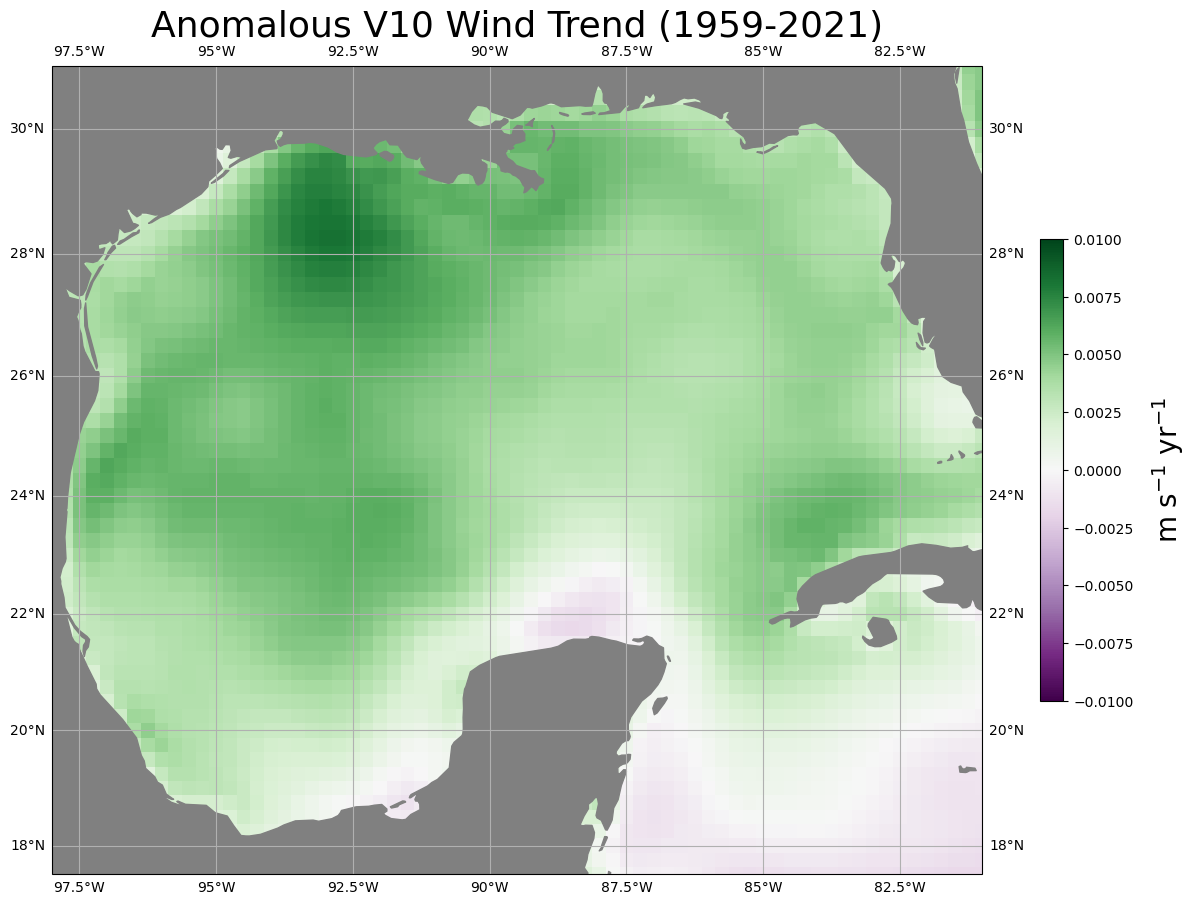

In [47]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_v.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.01, vmax=0.01)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"m s$^{-1}$ yr$^{-1}$", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous V10 Wind Trend (1959-2021)', fontsize=26);

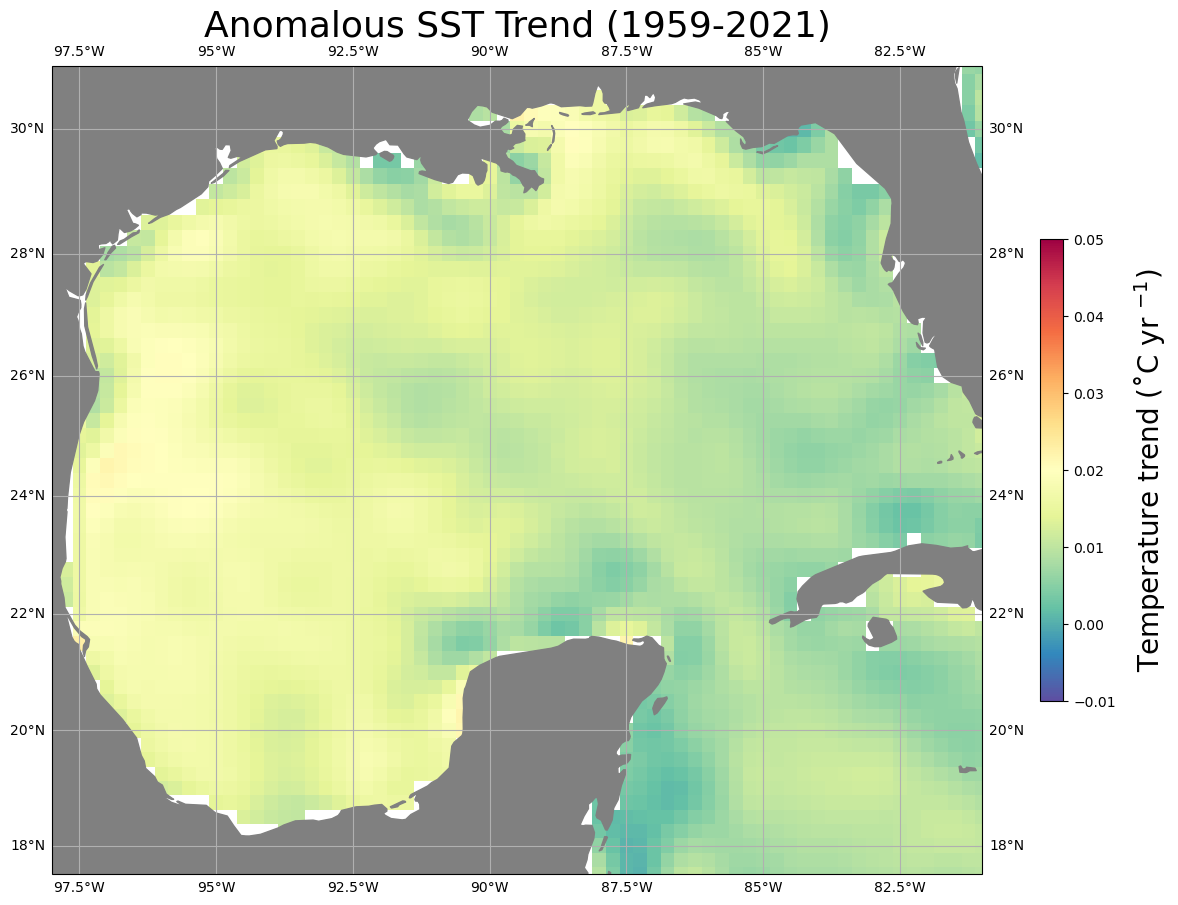

In [36]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_sst.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous SST Trend (1959-2021)', fontsize=26);

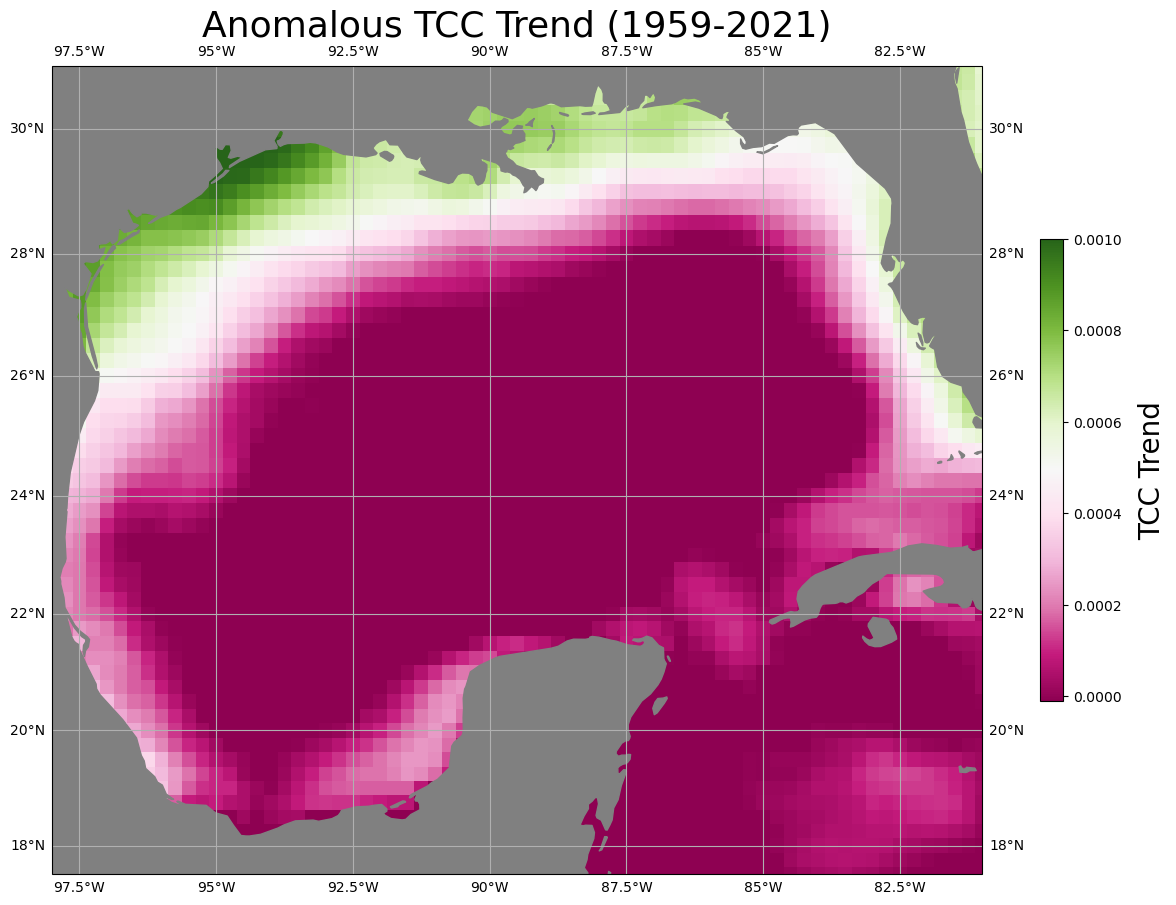

In [37]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_tcc.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PiYG', vmin=-1e-5, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous TCC Trend (1959-2021)', fontsize=26);

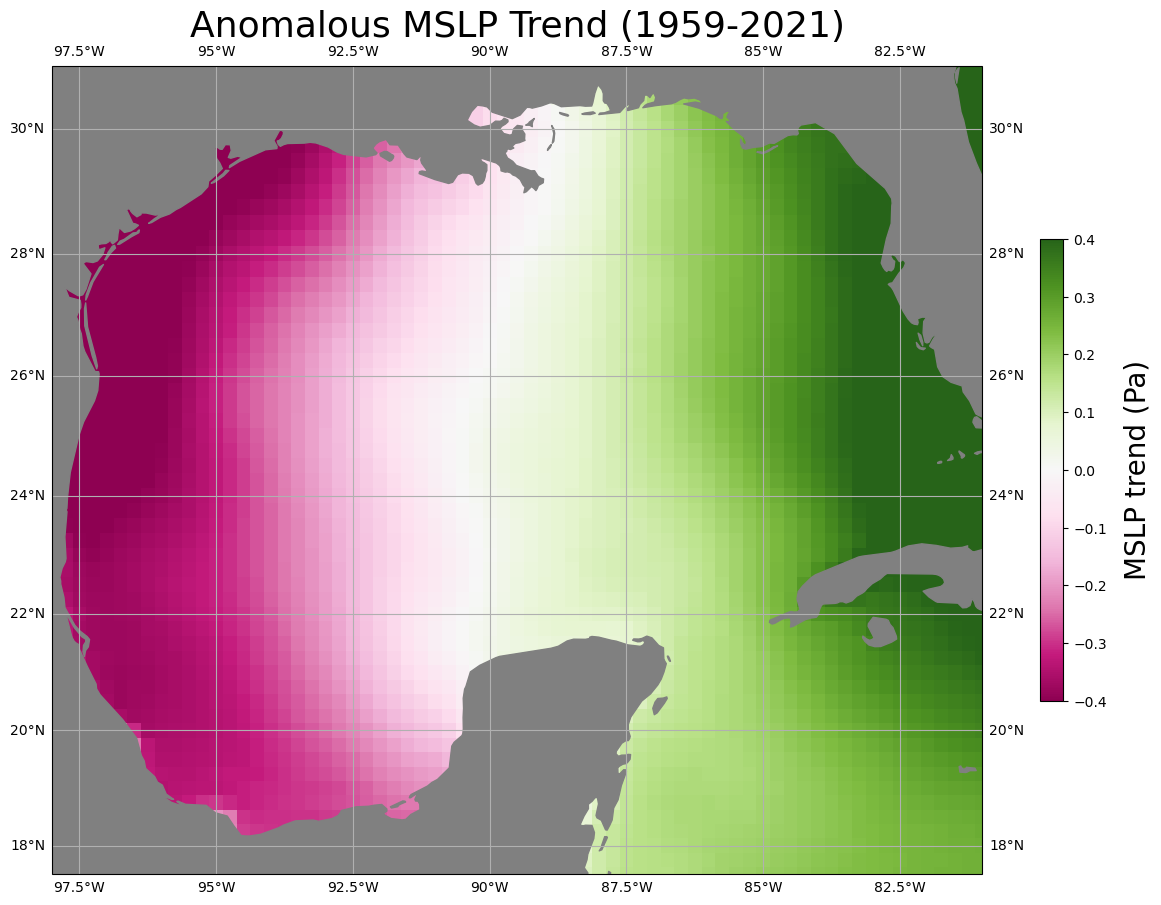

In [38]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_mslp.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PiYG', vmin=-0.4, vmax=0.4)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous MSLP Trend (1959-2021)', fontsize=26);

## Calculate trends from 1993-2021

In [ ]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_sst_9321 = sst.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_tcc_9321 = tcc.groupby('time.year').mean('time').polyfit('year', deg=1) #(0-1)/yr
trend_u10_9321 = u10.groupby('time.year').mean('time').polyfit('year', deg=1) # m/s/yr
trend_v10_9321 = v10.groupby('time.year').mean('time').polyfit('year', deg=1) # m/s/yr
trend_mslp_9321 = mslp.groupby('time.year').mean('time').polyfit('year', deg=1) # Pa/yr
trend_lcc_9321 = lcc.groupby('time.year').mean('time').polyfit('year', deg=1) #(0-1)/yr

In [8]:
trend_sst_9321

<xarray.Dataset> Size: 61kB
Dimensions:               (degree: 2, latitude: 55, longitude: 69)
Coordinates:
  * degree                (degree) int64 16B 1 0
  * latitude              (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
  * longitude             (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
Data variables:
    polyfit_coefficients  (degree, latitude, longitude) float64 61kB nan ... ...

## Trend maps (1993-2021)

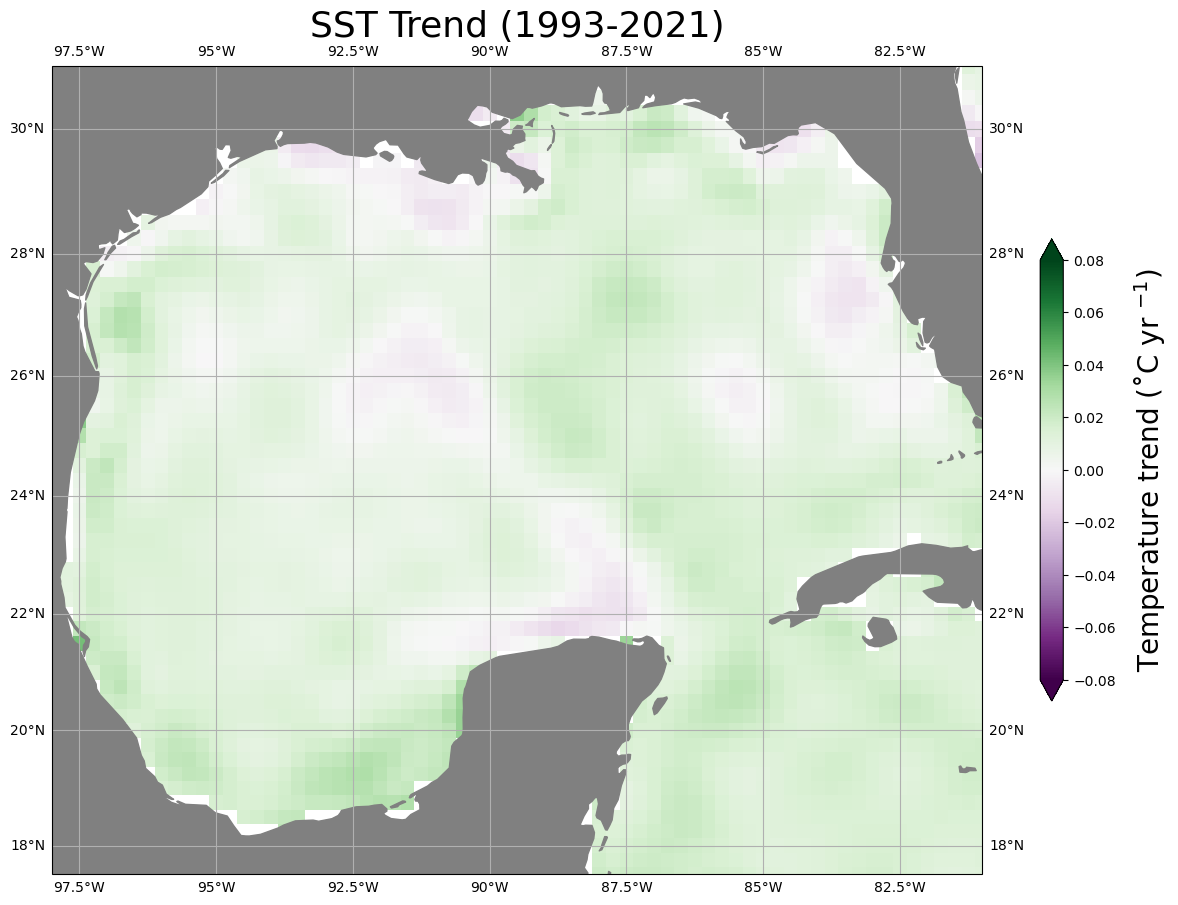

In [11]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.08, vmax=0.08)
cb = fig.colorbar(im, ax=ax, shrink=0.4, extend='both')
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1993-2021)', fontsize=26);

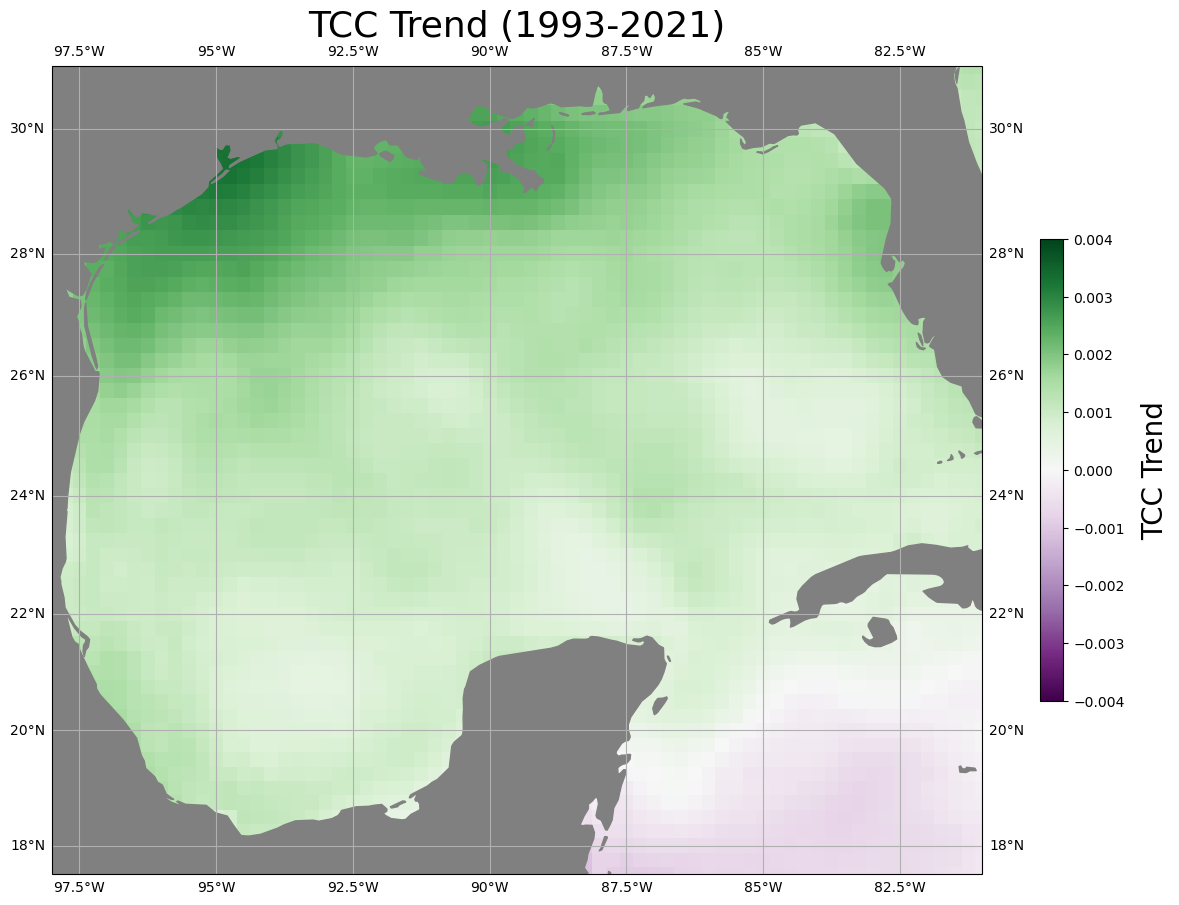

In [12]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-4e-3, vmax=4e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1993-2021)', fontsize=26);

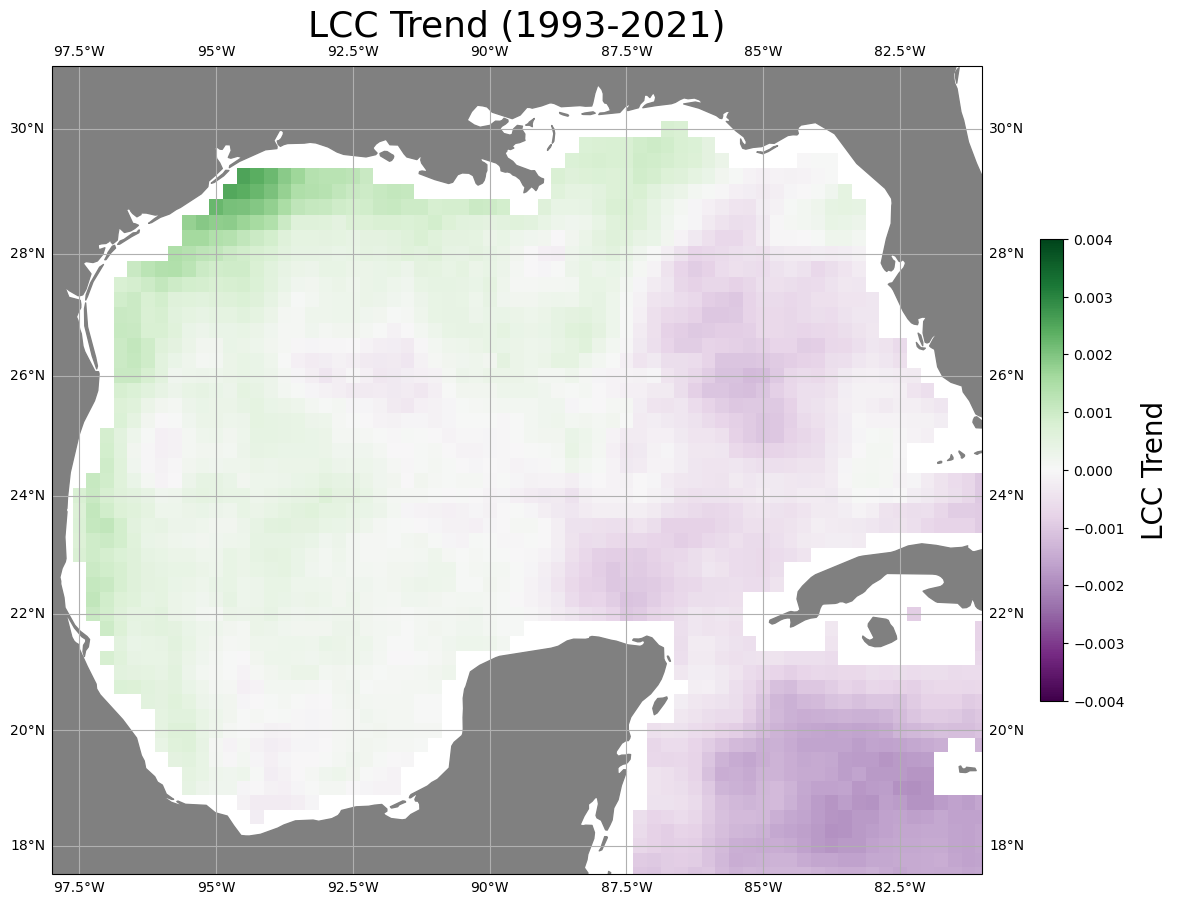

In [19]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_lcc_9321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-4e-3, vmax=4e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("LCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('LCC Trend (1993-2021)', fontsize=26);

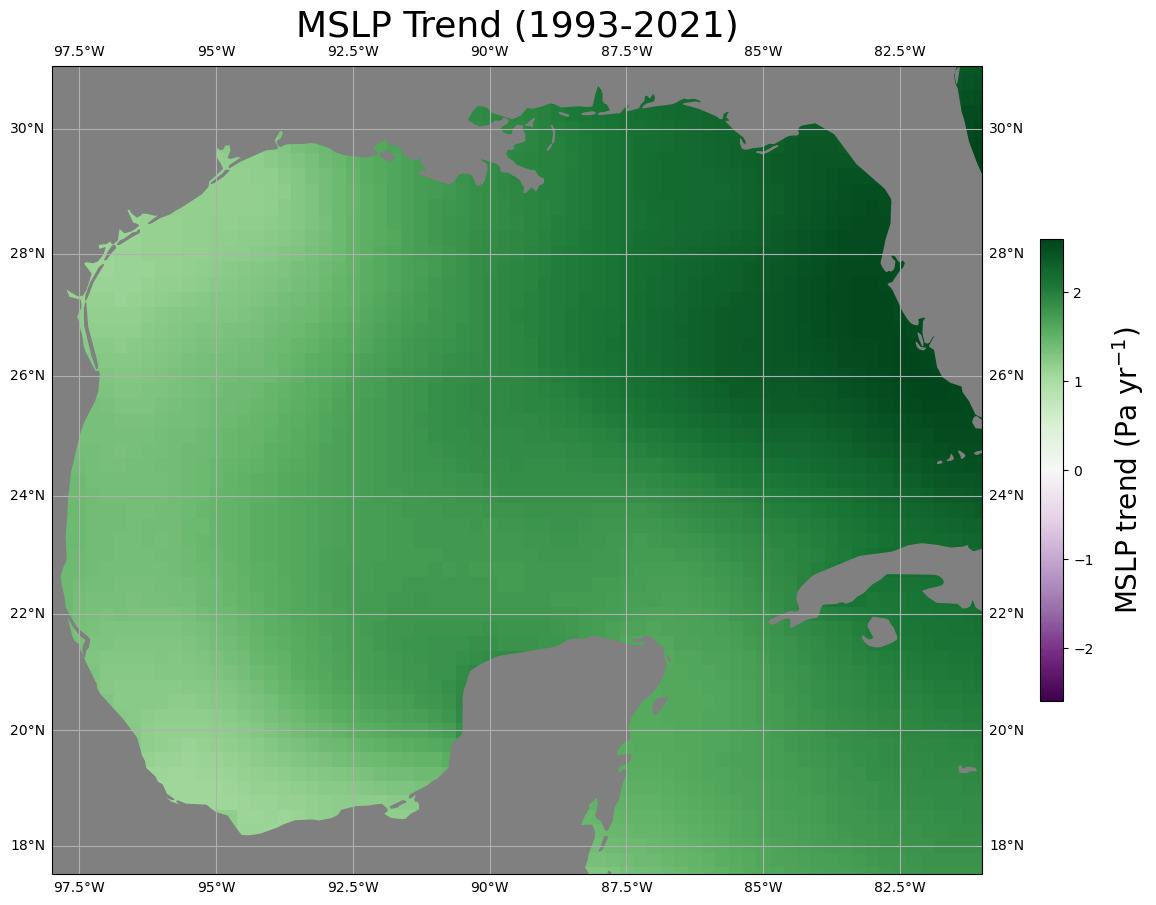

In [31]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1993-2021)', fontsize=26);

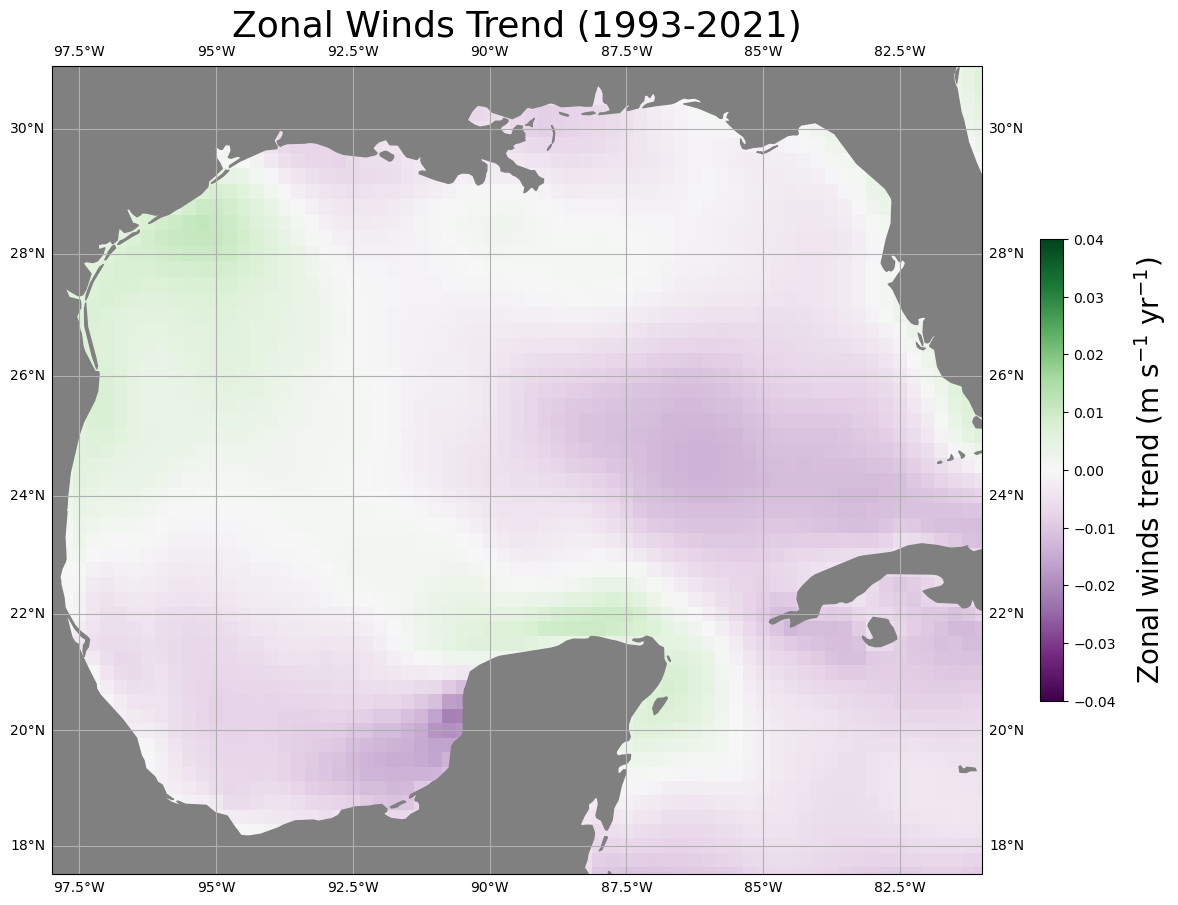

In [33]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_u10_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.04, vmax=0.04)#norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Zonal winds trend (m s$^{-1}$ yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Zonal Winds Trend (1993-2021)', fontsize=26);

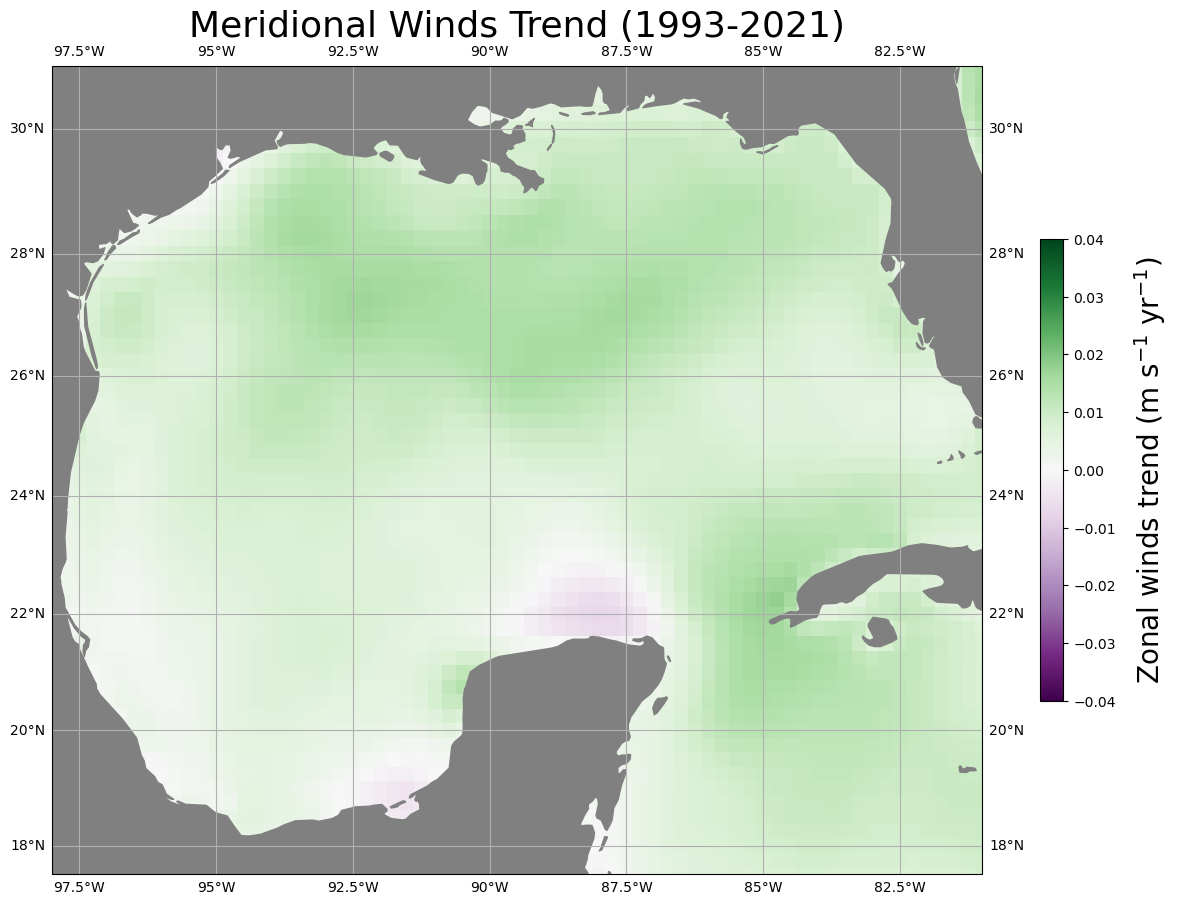

In [34]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_v10_9321.polyfit_coefficients[0]
norm = colors.CenteredNorm()
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='PRGn', vmin=-0.04, vmax=0.04)#norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Zonal winds trend (m s$^{-1}$ yr$^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Meridional Winds Trend (1993-2021)', fontsize=26);

## Calculate trends from 1983-2021

In [29]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_sst_8321 = sst.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_tcc_8321 = tcc.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_u10_8321 = u10.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_v10_8321 = v10.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_mslp_8321 = mslp.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)

KeyboardInterrupt: 

In [49]:
u10_anom

<xarray.DataArray '10m_u_component_of_wind' (time: 552264, latitude: 55,
                                             longitude: 69)> Size: 8GB
array([[[  1.8248231 ,   1.7870414 ,   1.7725568 , ...,  -6.1955094 ,
          -9.032493  ,  -9.465136  ],
        [  1.8474281 ,   1.8155588 ,   1.7911866 , ...,  -5.8764772 ,
          -9.074341  , -10.112228  ],
        [  1.9550784 ,   1.8676544 ,   1.7812744 , ...,  -5.943328  ,
          -9.210593  , -10.750723  ],
        ...,
        [  3.895605  ,   4.4390545 ,   1.7268584 , ...,   0.25675678,
           0.32551718,   0.40015125],
        [  2.5061693 ,   3.0501542 ,   2.2919736 , ...,   0.44289255,
           0.5042496 ,   0.55668354],
        [  1.595101  ,   2.2526238 ,   1.6274388 , ...,   0.42231703,
           0.45874882,   0.45539236]],

       [[  1.7437829 ,   1.4801515 ,   1.3534063 , ...,  -6.069299  ,
          -8.803987  ,  -9.334276  ],
        [  1.5405382 ,   1.4495494 ,   1.3361658 , ...,  -6.091034  ,
          -8.823914  ,  -9.875086  ],
        [  1.5352637 ,   1.3986841 ,   1.3010117 , ...,  -6.517252  ,
          -9.293626  , -10.485682  ],
...
        [  3.8057055 ,   4.814938  ,   3.3401303 , ...,  -1.3455114 ,
          -1.2611628 ,  -1.1700644 ],
        [  2.5622065 ,   3.5726223 ,   3.4492645 , ...,  -1.350512  ,
          -1.2170548 ,  -1.1397376 ],
        [  2.0502064 ,   3.0604067 ,   3.1024528 , ...,  -1.4102993 ,
          -1.2739367 ,  -1.2092428 ]],

       [[ -0.79417807,  -0.8133242 ,  -0.78334224, ...,   1.7594442 ,
           2.9294176 ,   2.620281  ],
        [ -0.6179383 ,  -0.7579064 ,  -0.8124119 , ...,   1.4949054 ,
           2.1833029 ,   1.8013806 ],
        [ -0.6123183 ,  -0.7428984 ,  -0.87523425, ...,   0.93366426,
           1.1548083 ,   0.51429033],
        ...,
        [  3.6984406 ,   4.774903  ,   3.2238007 , ...,  -1.2873468 ,
          -1.2732487 ,  -1.1632657 ],
        [  2.4549415 ,   3.5325868 ,   3.3238704 , ...,  -1.3558002 ,
          -1.2510476 ,  -1.1563554 ],
        [  1.8145258 ,   2.9961987 ,   3.0057635 , ...,  -1.4631767 ,
          -1.3358788 ,  -1.2462568 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12-31T23:00:00
    dayofyear  (time) int64 4MB 1 1 1 1 1 1 1 1 ... 365 365 365 365 365 365 365

In [50]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_anom_sst_8321 = sst_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_anom_tcc_8321 = tcc_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_u10_8321 = u_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_v10_8321 = v_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_mslp_8321 = mslp_anom.sel(time=slice('1983',None)).groupby('time.year').mean('time').polyfit('year', deg=1)

NameError: name 'u_anom' is not defined

## Trend maps (1983-2021)

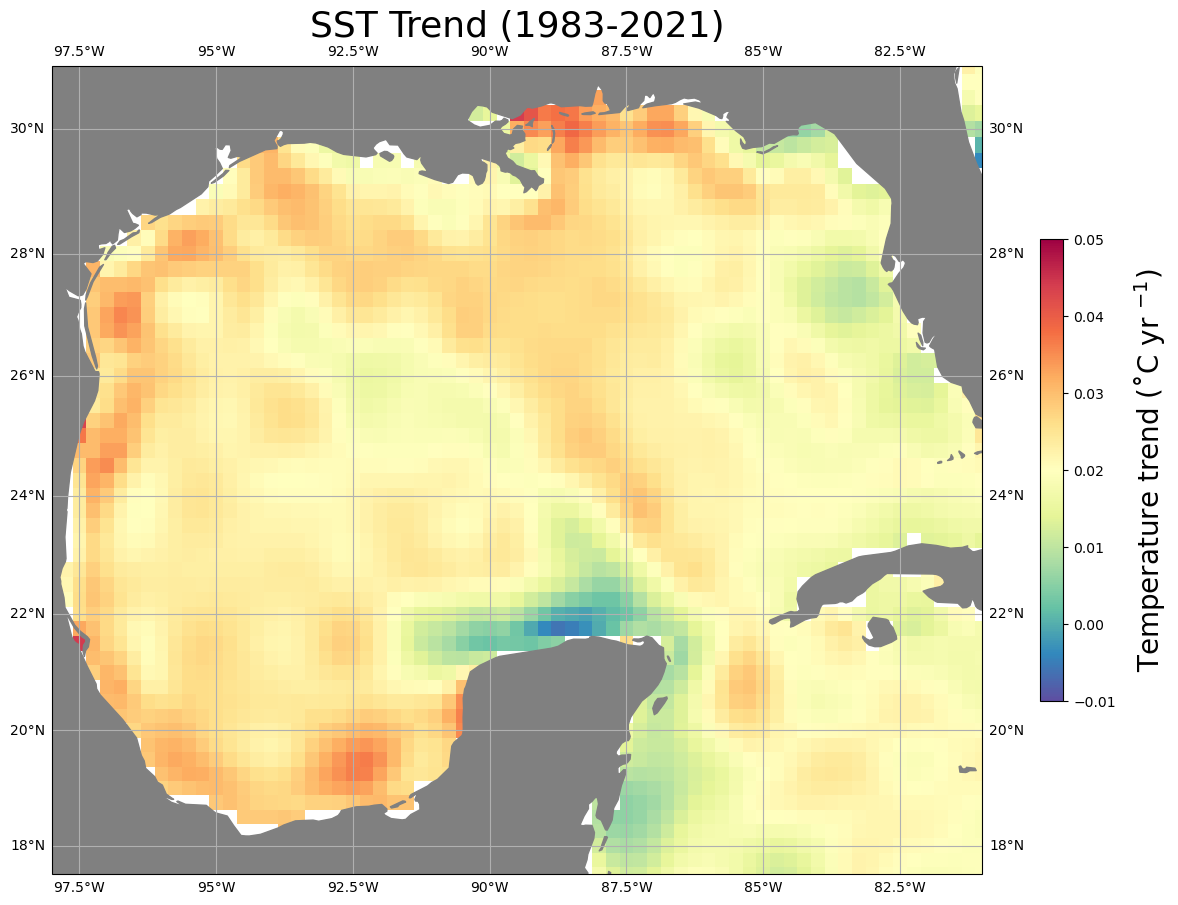

In [46]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_sst_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Trend (1983-2021)', fontsize=26);

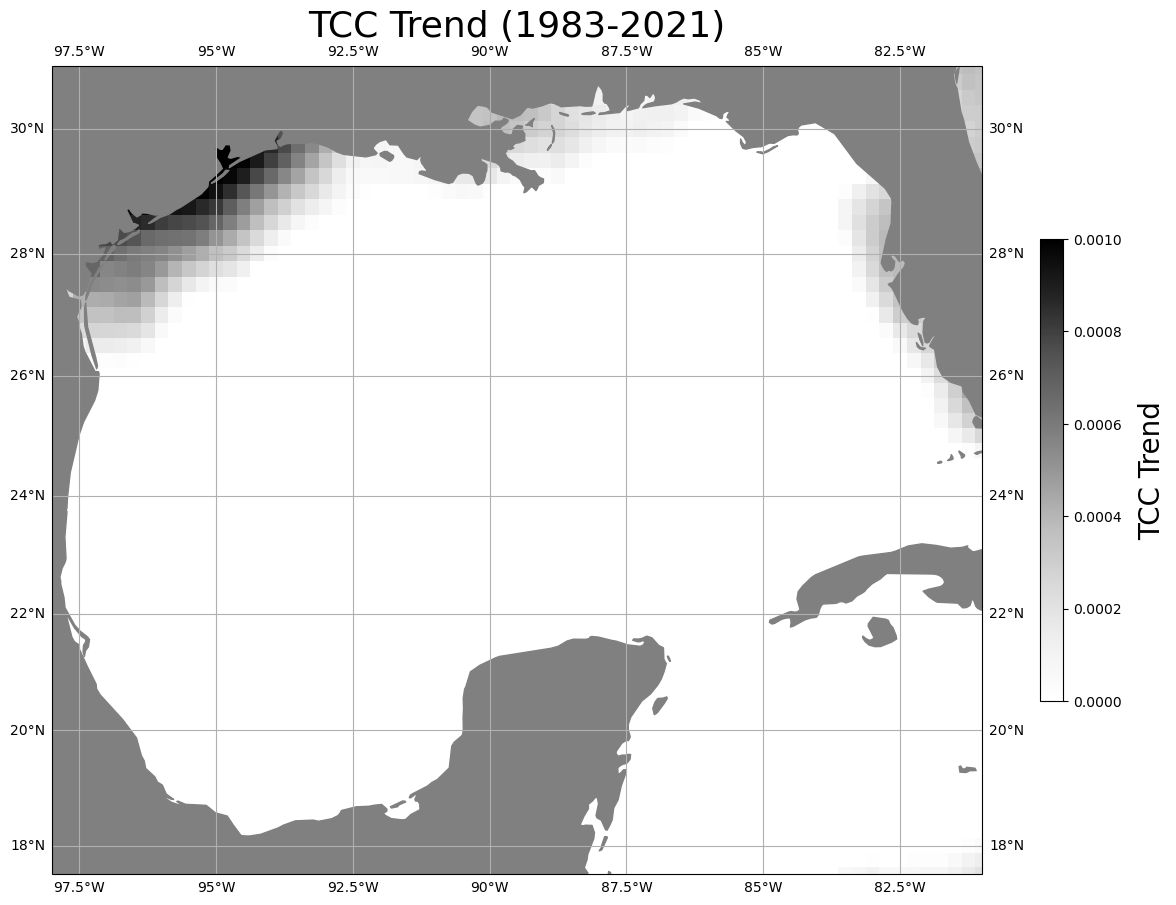

In [56]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_tcc_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Greys', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('TCC Trend (1983-2021)', fontsize=26);

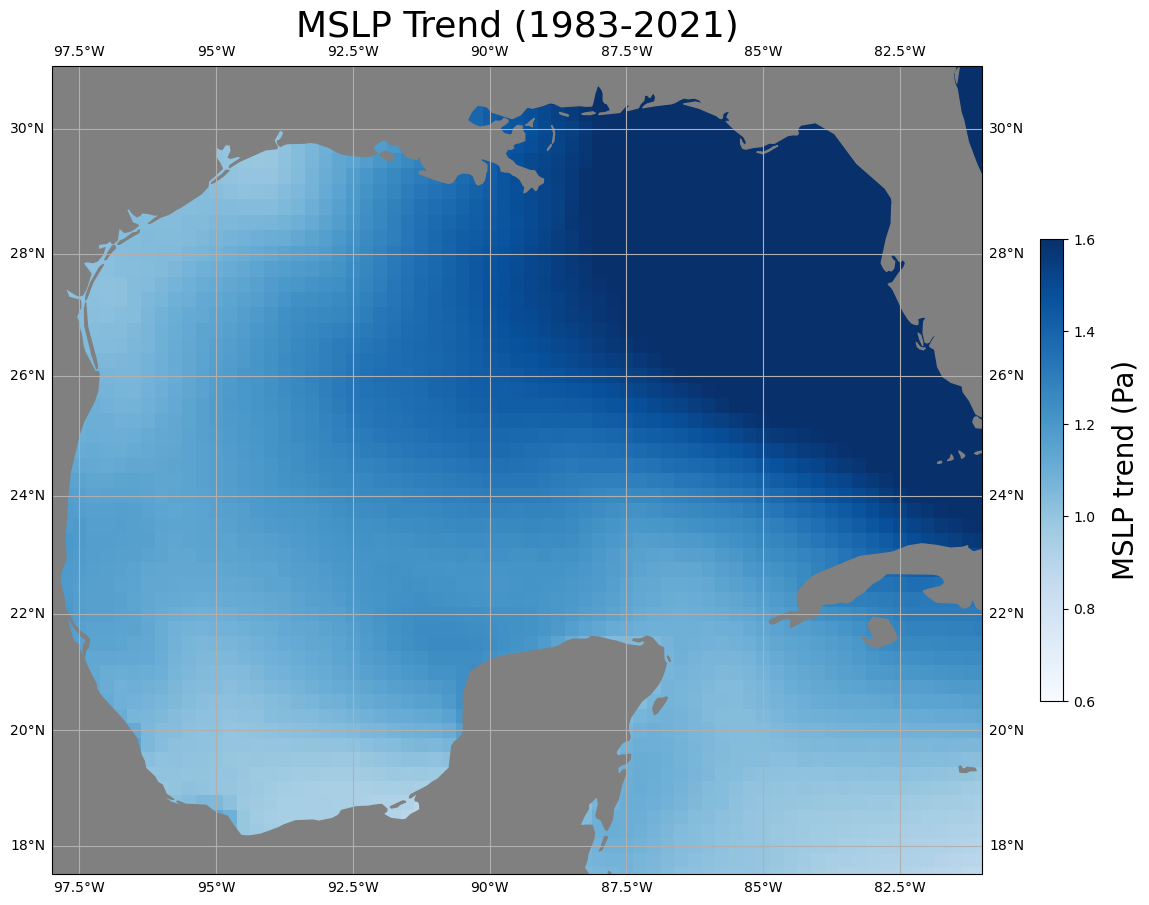

In [58]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_mslp_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Blues', vmin=0.6, vmax=1.6)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('MSLP Trend (1983-2021)', fontsize=26);

## Trend maps of anomalies (1983-2021)

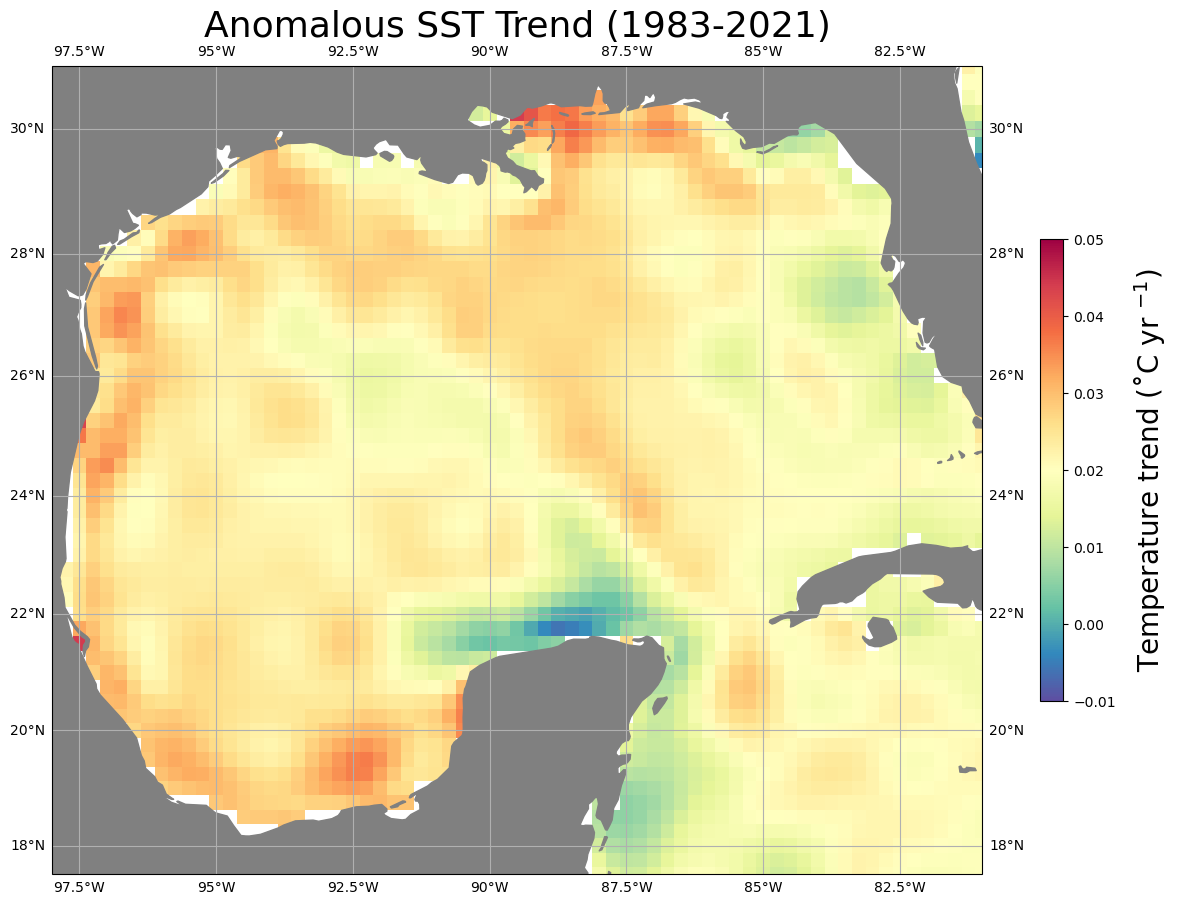

In [59]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_sst_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous SST Trend (1983-2021)', fontsize=26);

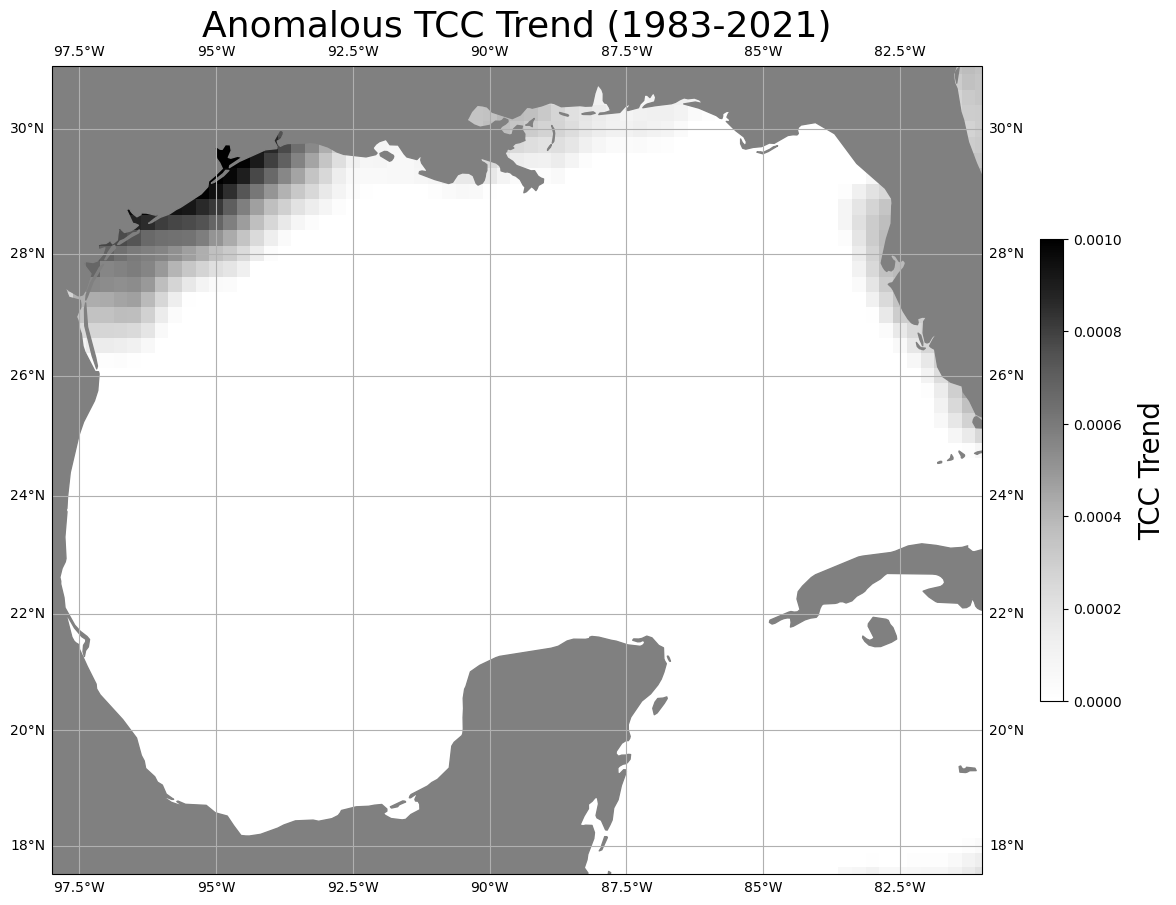

In [61]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_tcc_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Greys', vmin=0, vmax=1e-3)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("TCC Trend", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous TCC Trend (1983-2021)', fontsize=26);

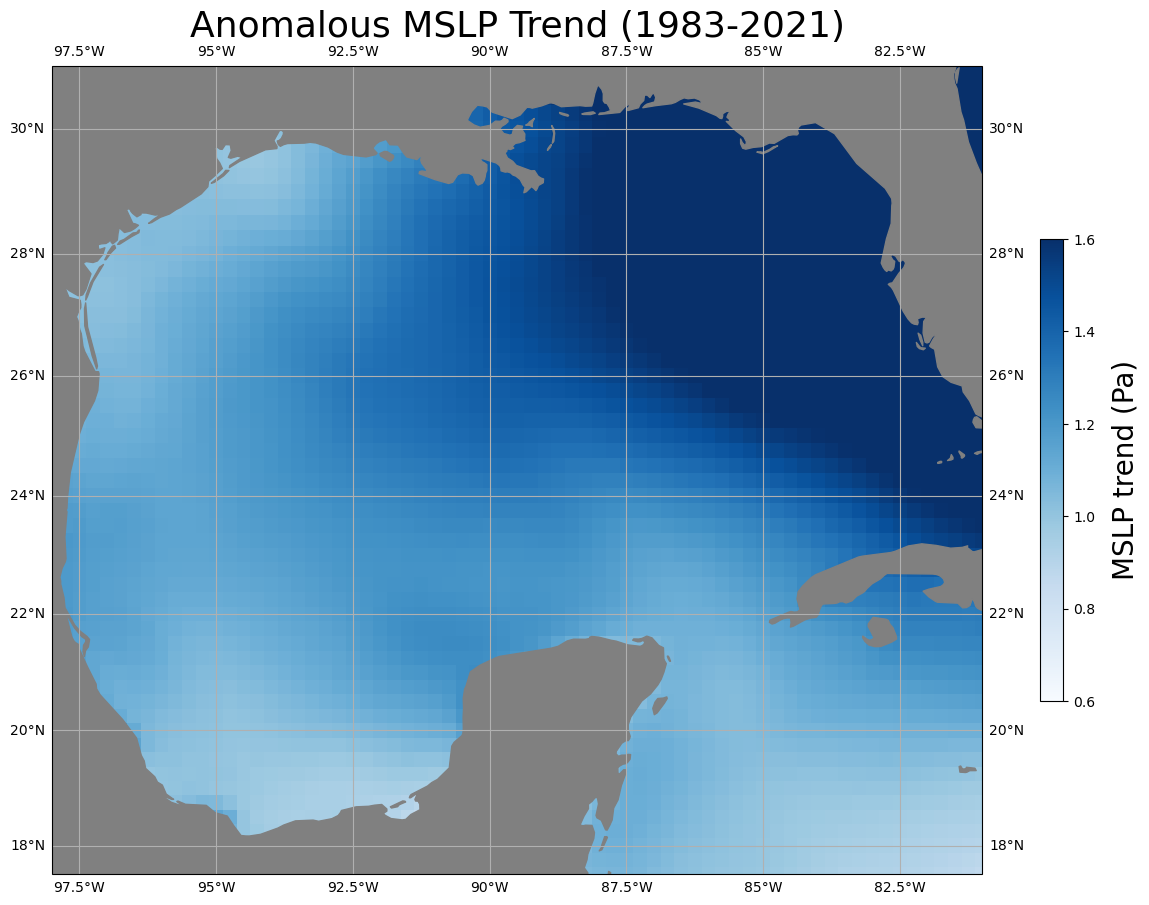

In [63]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend_anom_mslp_8321.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Blues', vmin=0.6, vmax=1.6)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("MSLP trend (Pa)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('Anomalous MSLP Trend (1983-2021)', fontsize=26);